In [10]:
import sys
sys.path.append("../")
sys.path.append("../..")

import numpy as np
import matplotlib.pyplot as plt
from tqdm import *
from scipy.integrate import nquad
from scipy.interpolate import interp1d
from scipy.special import erf
import matplotlib as mpl
import matplotlib.pylab as pylab
from cycler import cycler
import palettable
from matplotlib.animation import FuncAnimation

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

from matplotlib import animation, rc
from IPython.display import HTML

from theory.units import *
from theory.spec_calc import PowerSpectra
from simulation.demo_sim import DemoSim

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [185]:
from plot_params import params

alpha_global = 0.8
pylab.rcParams.update(params)
plots_dir = "/Users/smsharma/Dropbox/Projects/LensPowerSpectra/LensPower/Draft/plots/"

save_figs = True

cols = ['grey', 'firebrick', 'cornflowerblue'] # + palettable.wesanderson.FantasticFox2_5.hex_colors
cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [12]:
output_dir = "/Users/smsharma/Desktop/"

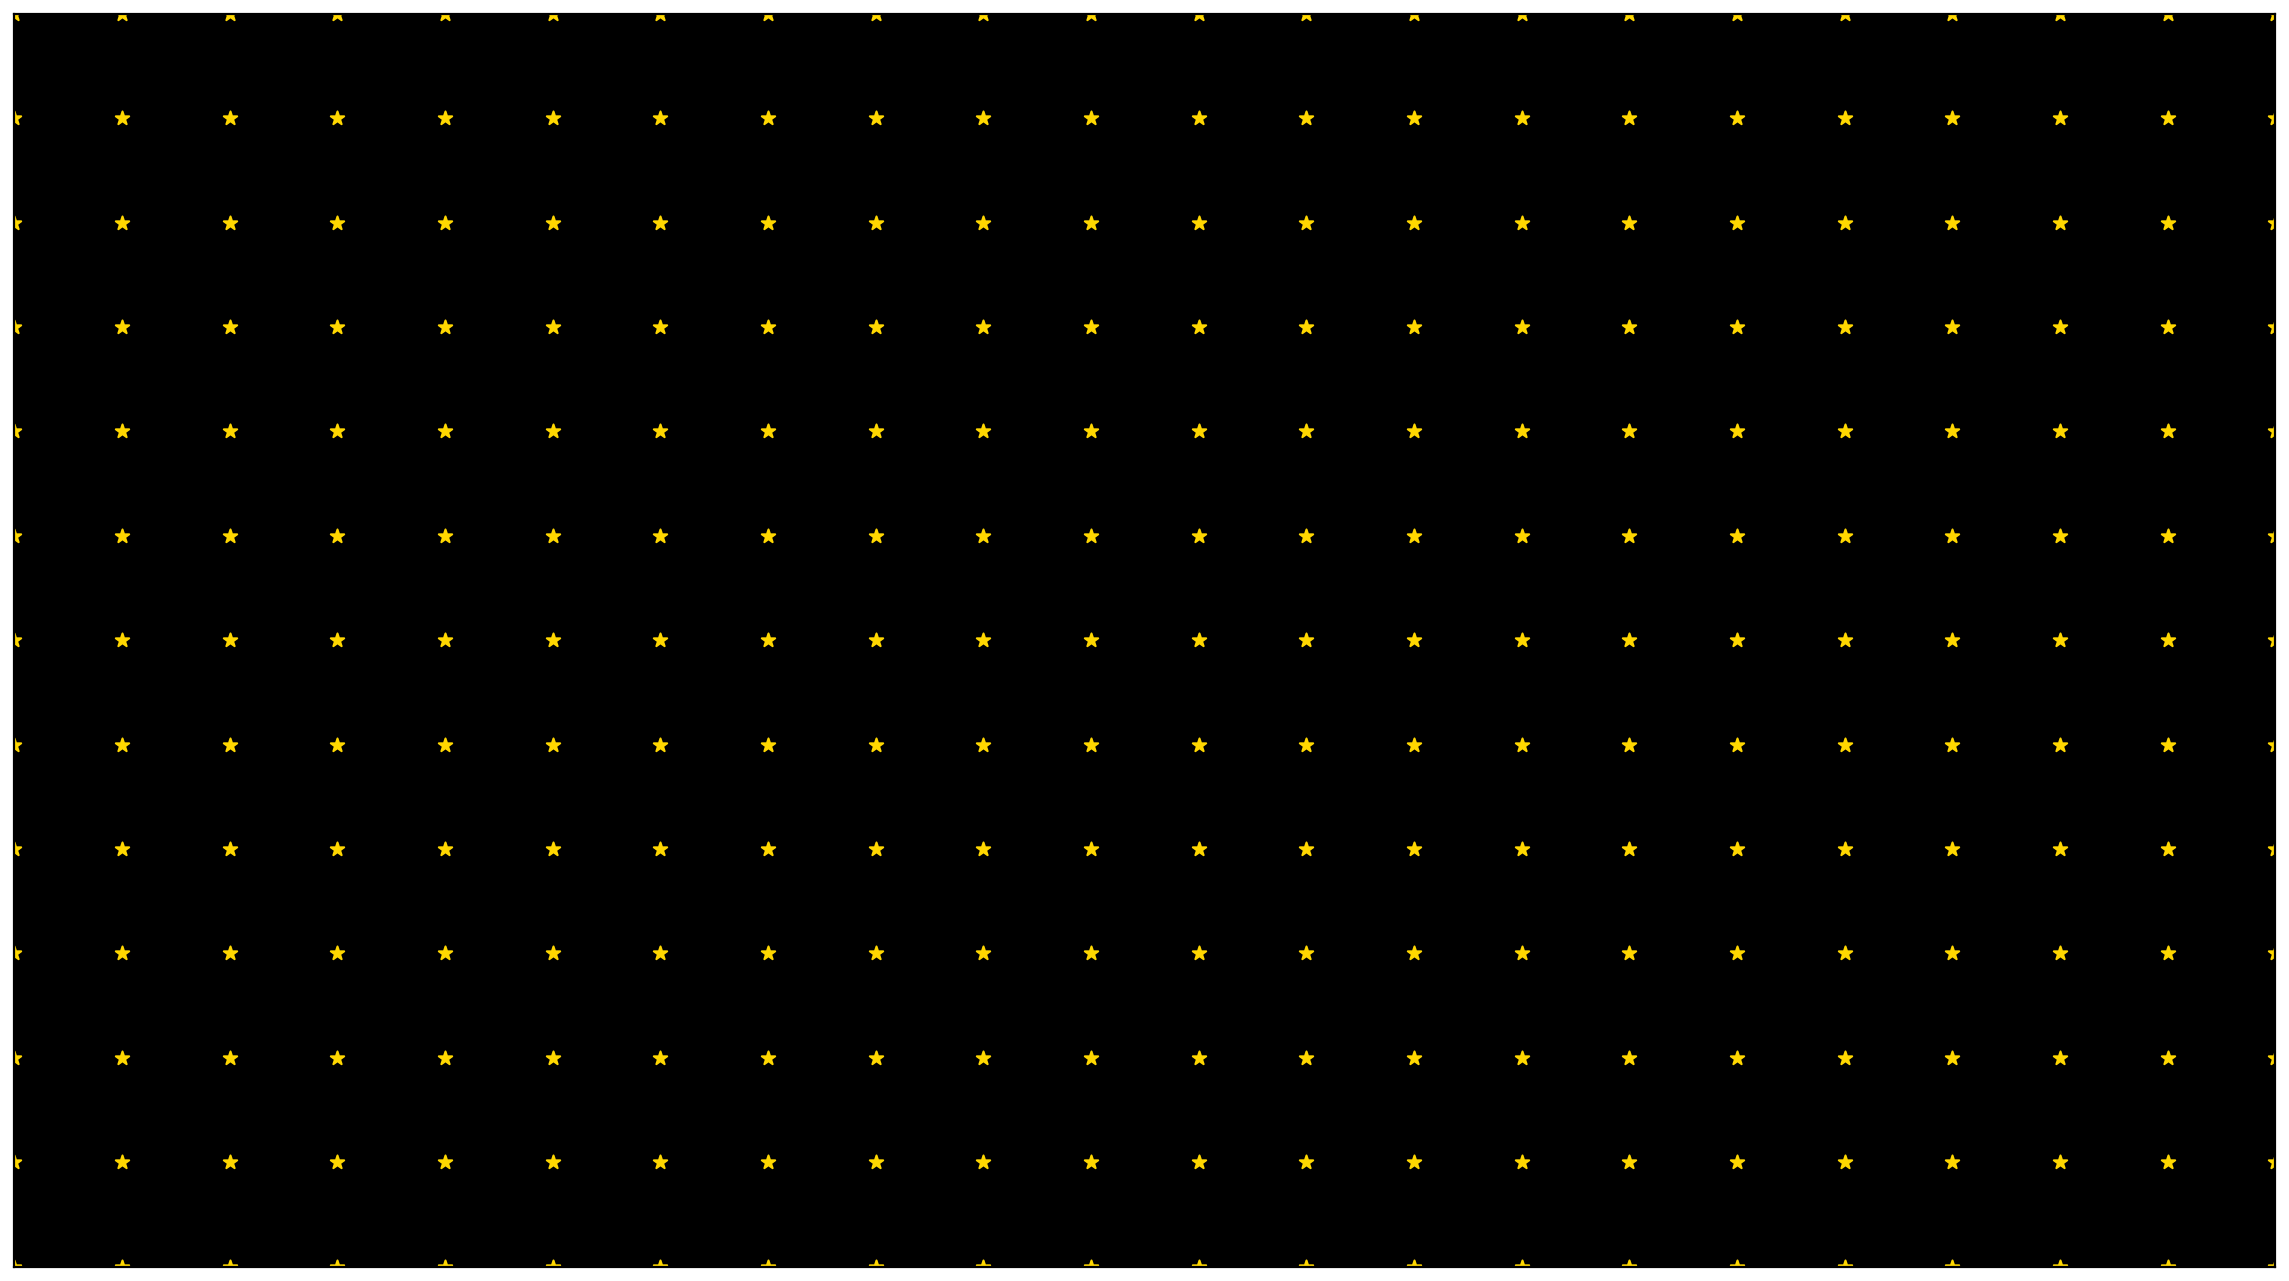

In [13]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9]
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}
star_orig_kwargs={'marker':'*', 'color':'gold','s':50}


anim = ds.animation(dt=10, 
                    pos_l=np.array([[-.8,0],[.5,.5]]), v_l=np.array([[50,0],[50,-100]]) * Kmps, R_l=[0.1 * pc, 0.05 *pc], M_l=[5e5 * M_s, 1e5 * M_s],
                    D_l=[100 * kpc, 100 * kpc], n_frames=500, arrow_mult=2000, animate=False, show_lens=False, show_vel_arrows=False, show_sources=False, show_orig=True,
                    n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs,
                    star_orig_kwargs=star_orig_kwargs, n_dens = 50,
                    source_pos="uniform")

plt.tight_layout()
plt.savefig(output_dir + "uniform.pdf")


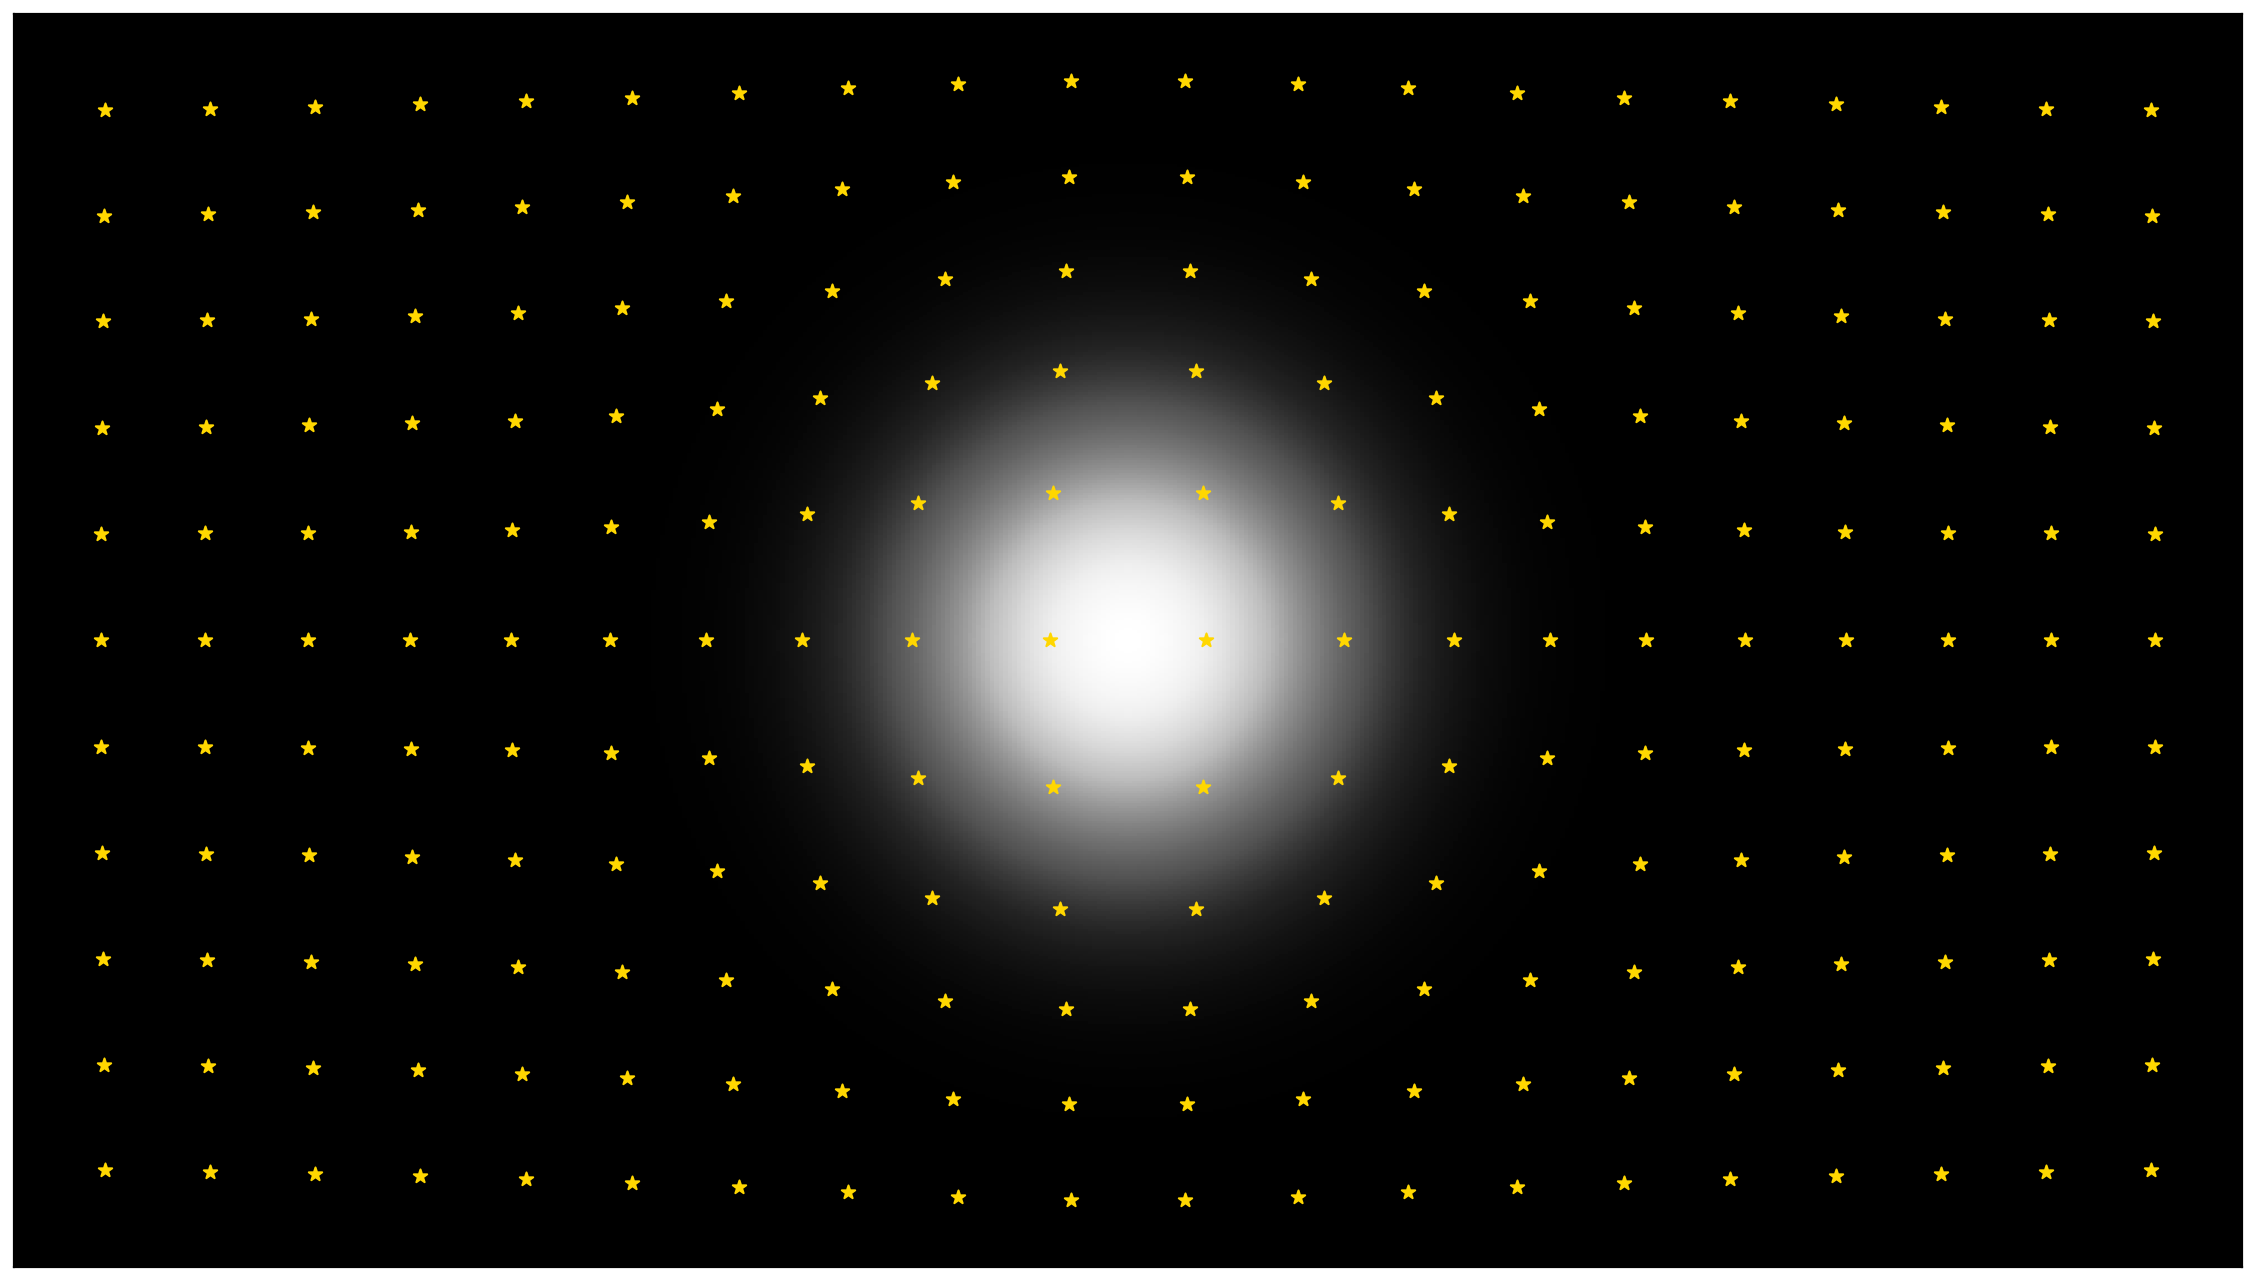

In [14]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9]
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}
star_orig_kwargs={'marker':'*', 'color':'gold','s':50}


anim = ds.animation(dt=10, 
                    pos_l=np.array([[0,0]]), v_l=np.array([[50,0]]) * Kmps, R_l=[0.1 * pc], M_l=[5e5 * M_s],
                    D_l=[100 * kpc], n_frames=500, arrow_mult=2000, animate=False, show_lens=True, show_vel_arrows=False, show_sources=True, show_orig=False,
                    n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs,
                    star_orig_kwargs=star_orig_kwargs, n_dens = 50,
                    source_pos="uniform")

plt.tight_layout()
plt.savefig(output_dir + "uniform_lens.pdf")


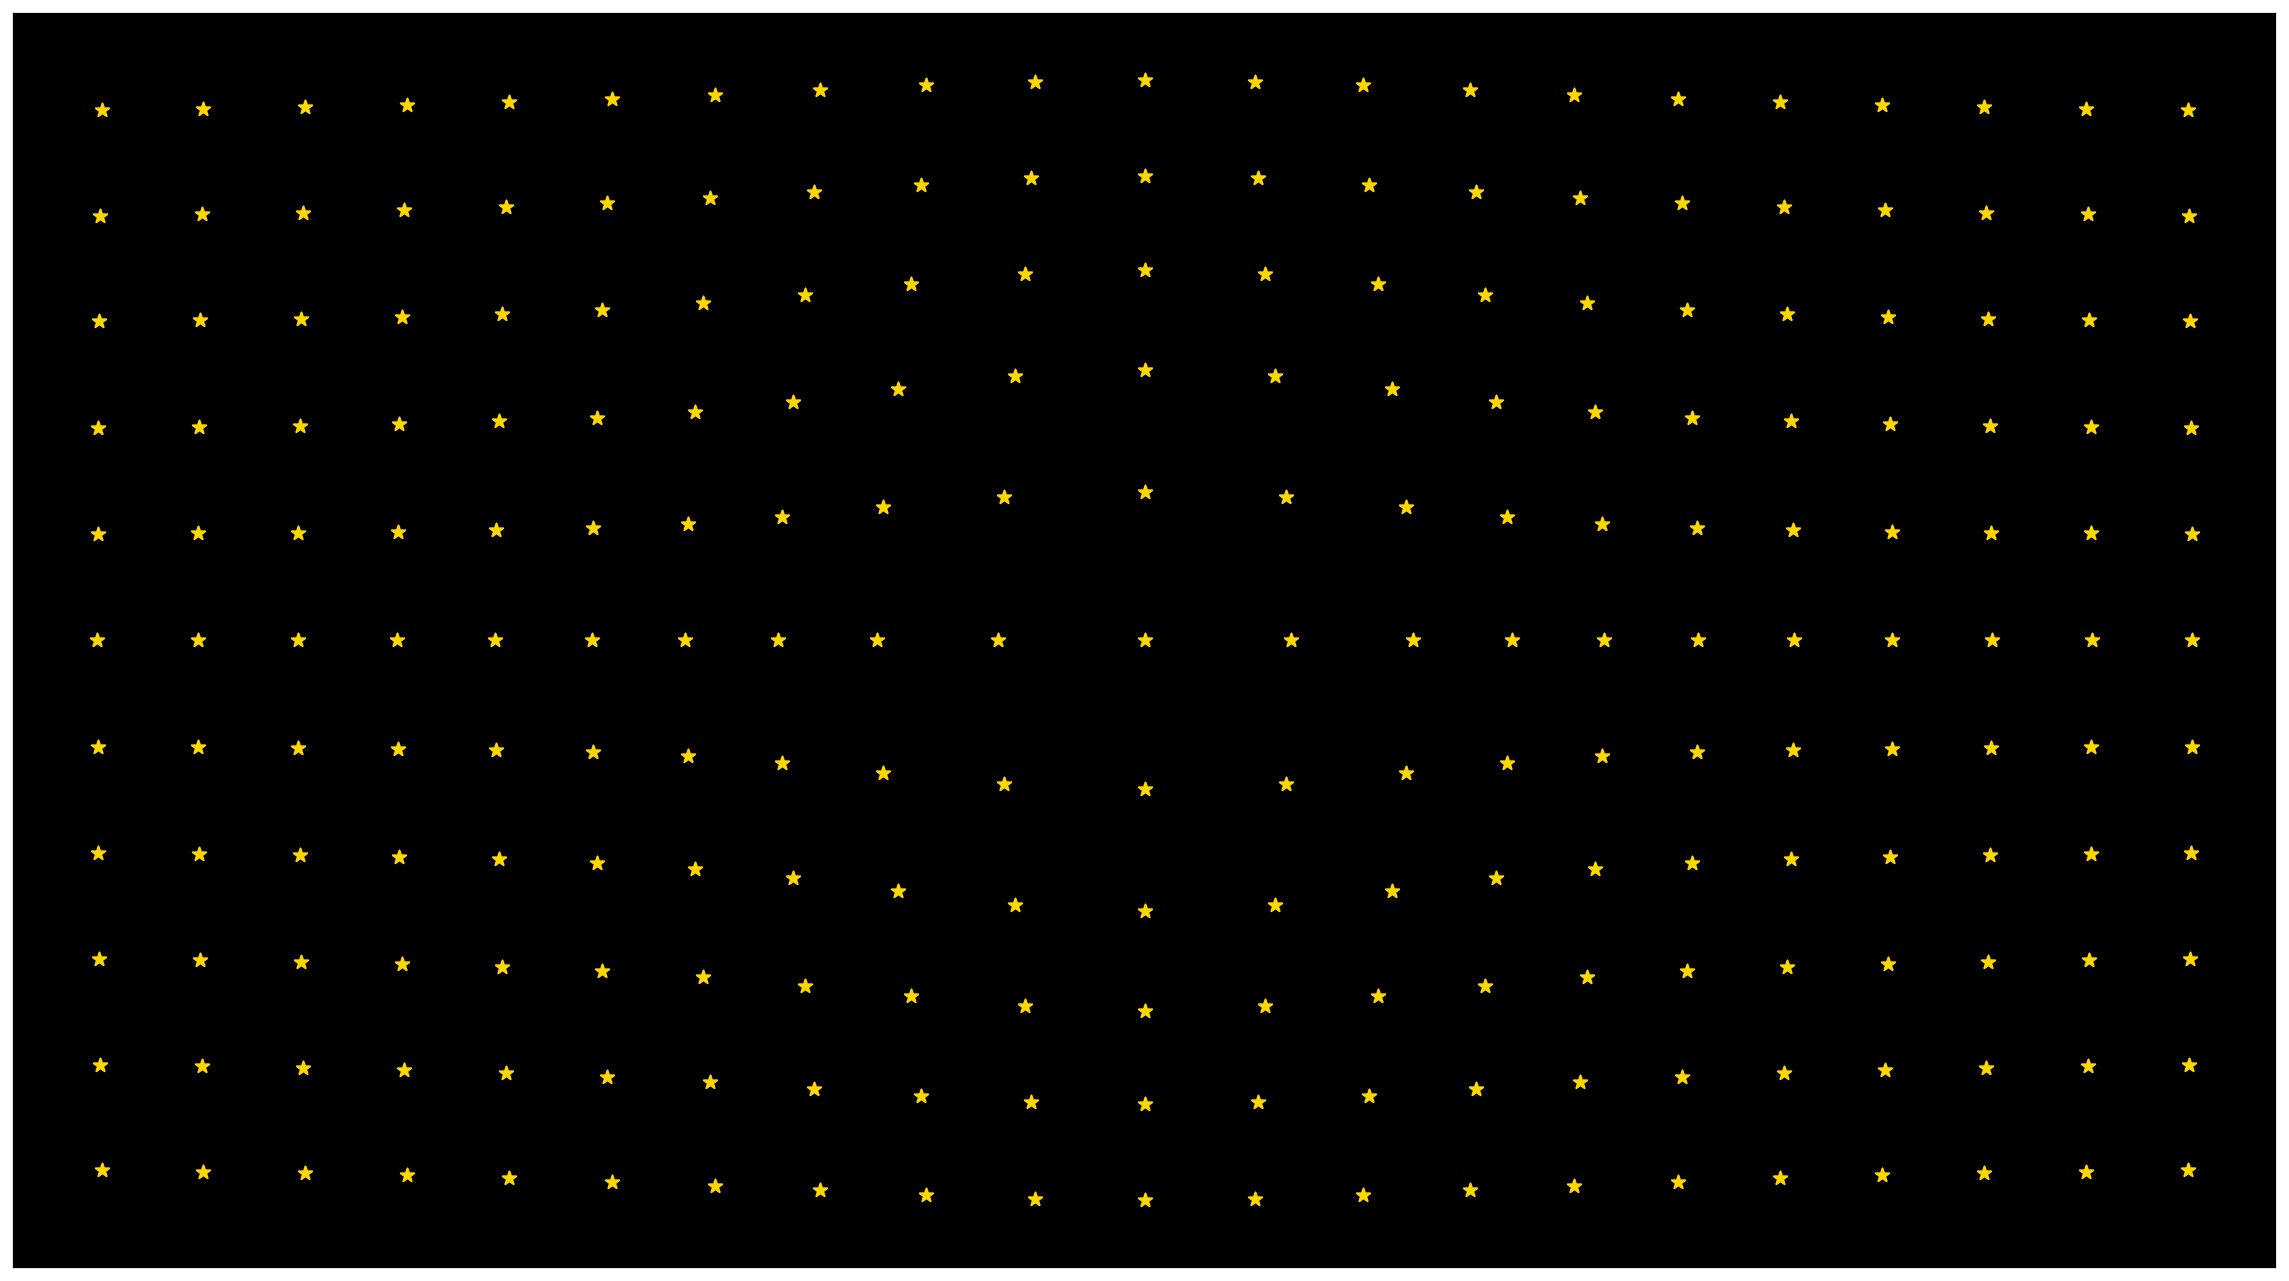

In [15]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9]
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}
star_orig_kwargs={'marker':'*', 'color':'gold','s':50}


anim = ds.animation(dt=10, 
                    pos_l=np.array([[0,0]]), v_l=np.array([[50,0]]) * Kmps, R_l=[0.1 * pc], M_l=[5e5 * M_s],
                    D_l=[100 * kpc], n_frames=500, arrow_mult=2000, animate=False, show_lens=False, show_vel_arrows=False, show_sources=True, show_orig=False,
                    n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs,
                    star_orig_kwargs=star_orig_kwargs, n_dens = 50,
                    source_pos="uniform")

plt.tight_layout()
plt.savefig(output_dir + "uniform_lens_nolens.pdf")


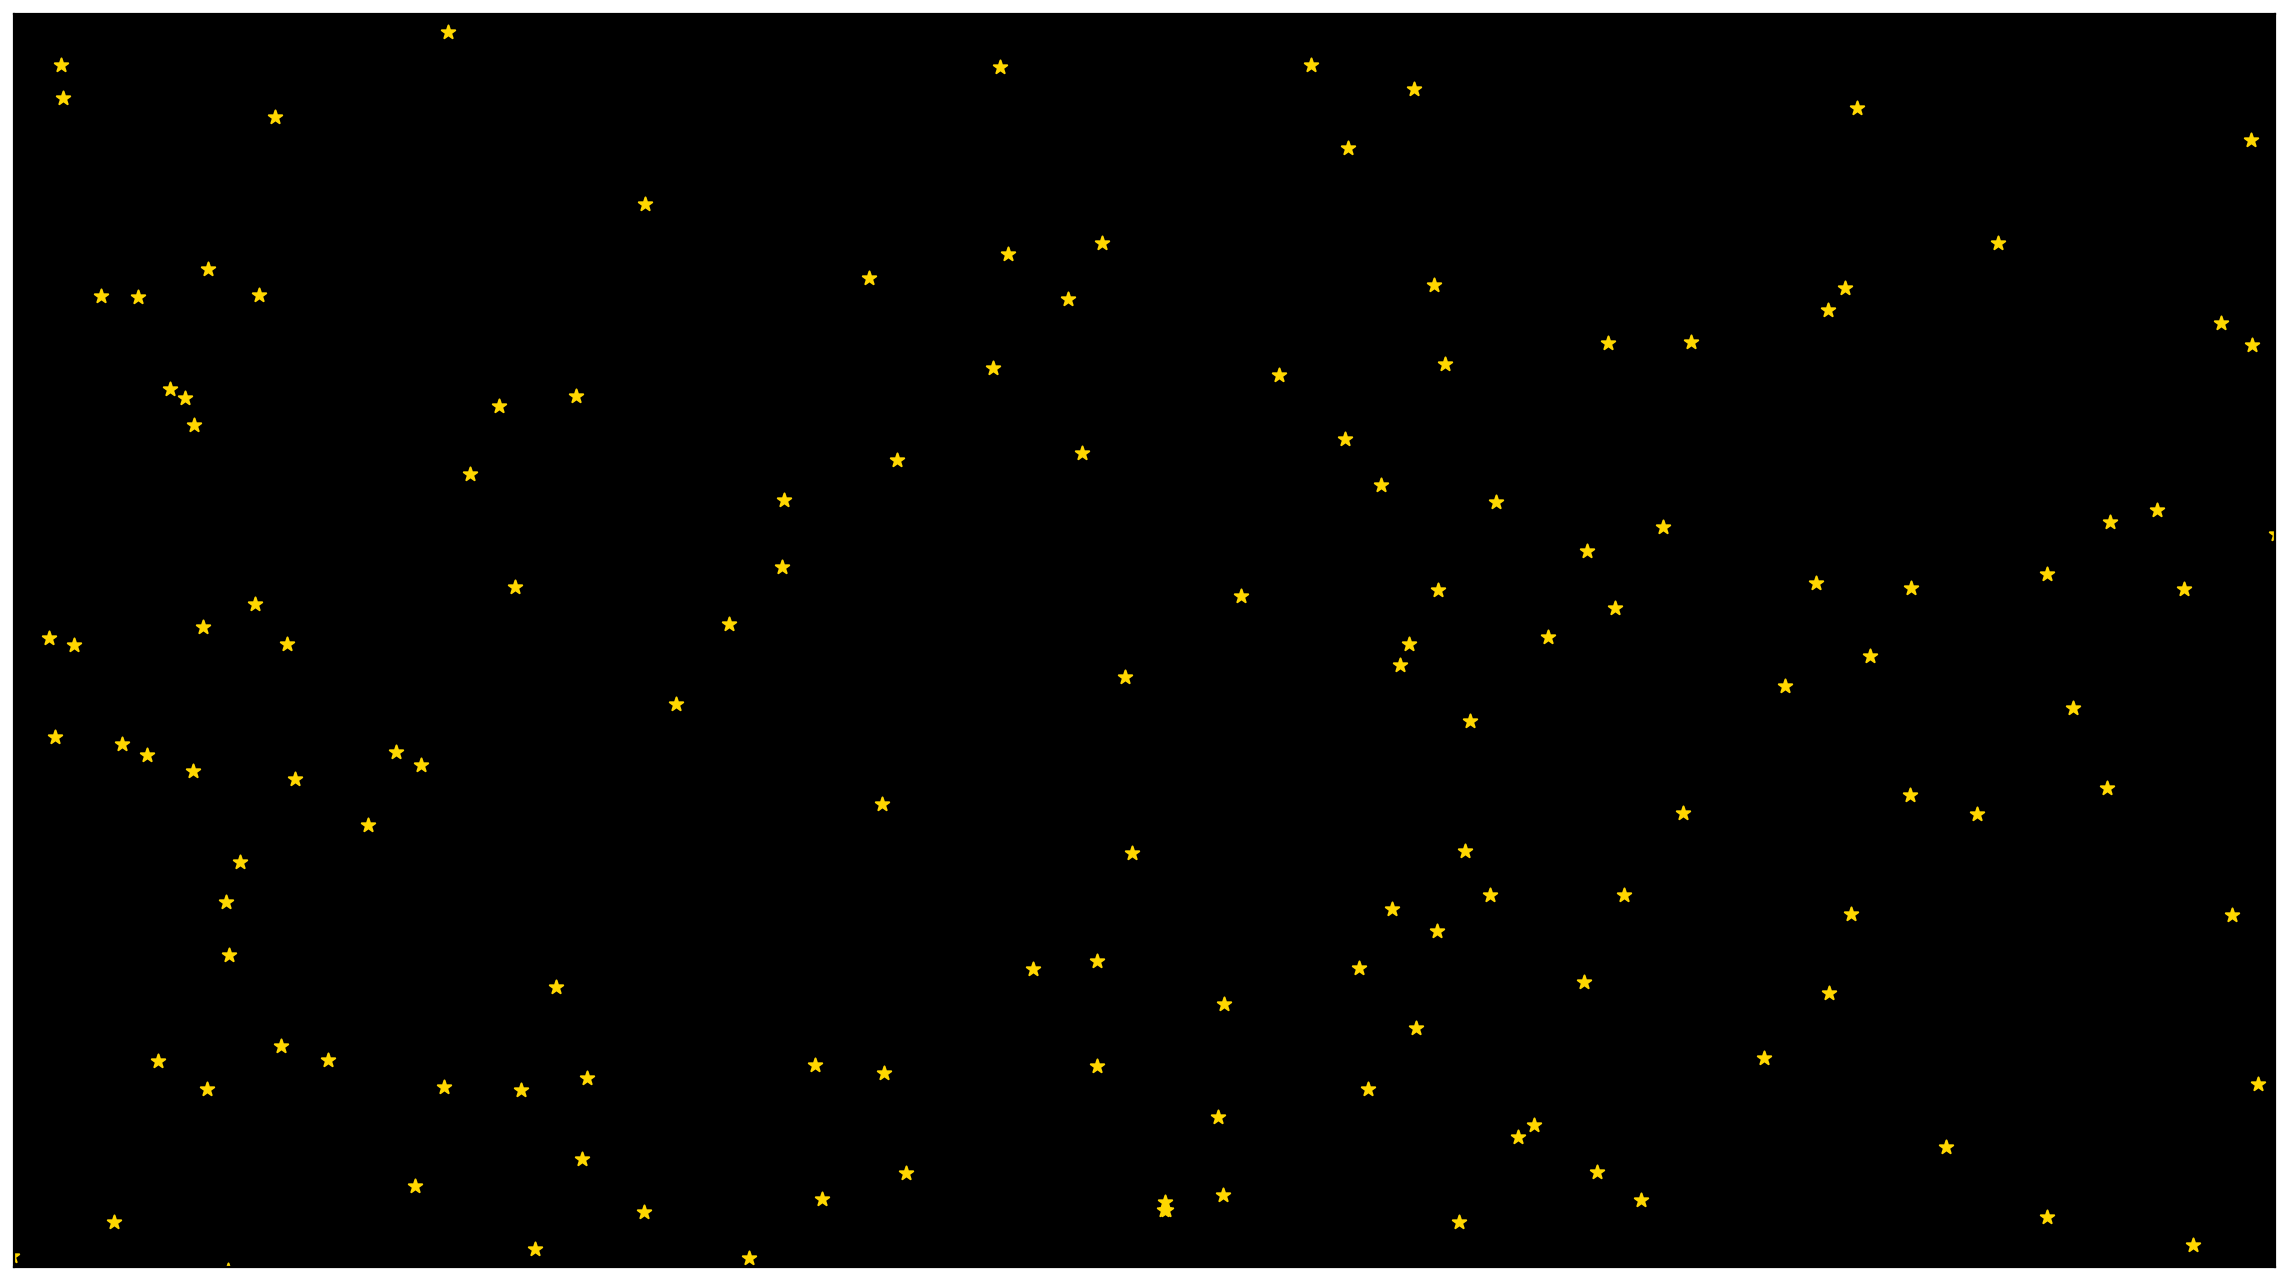

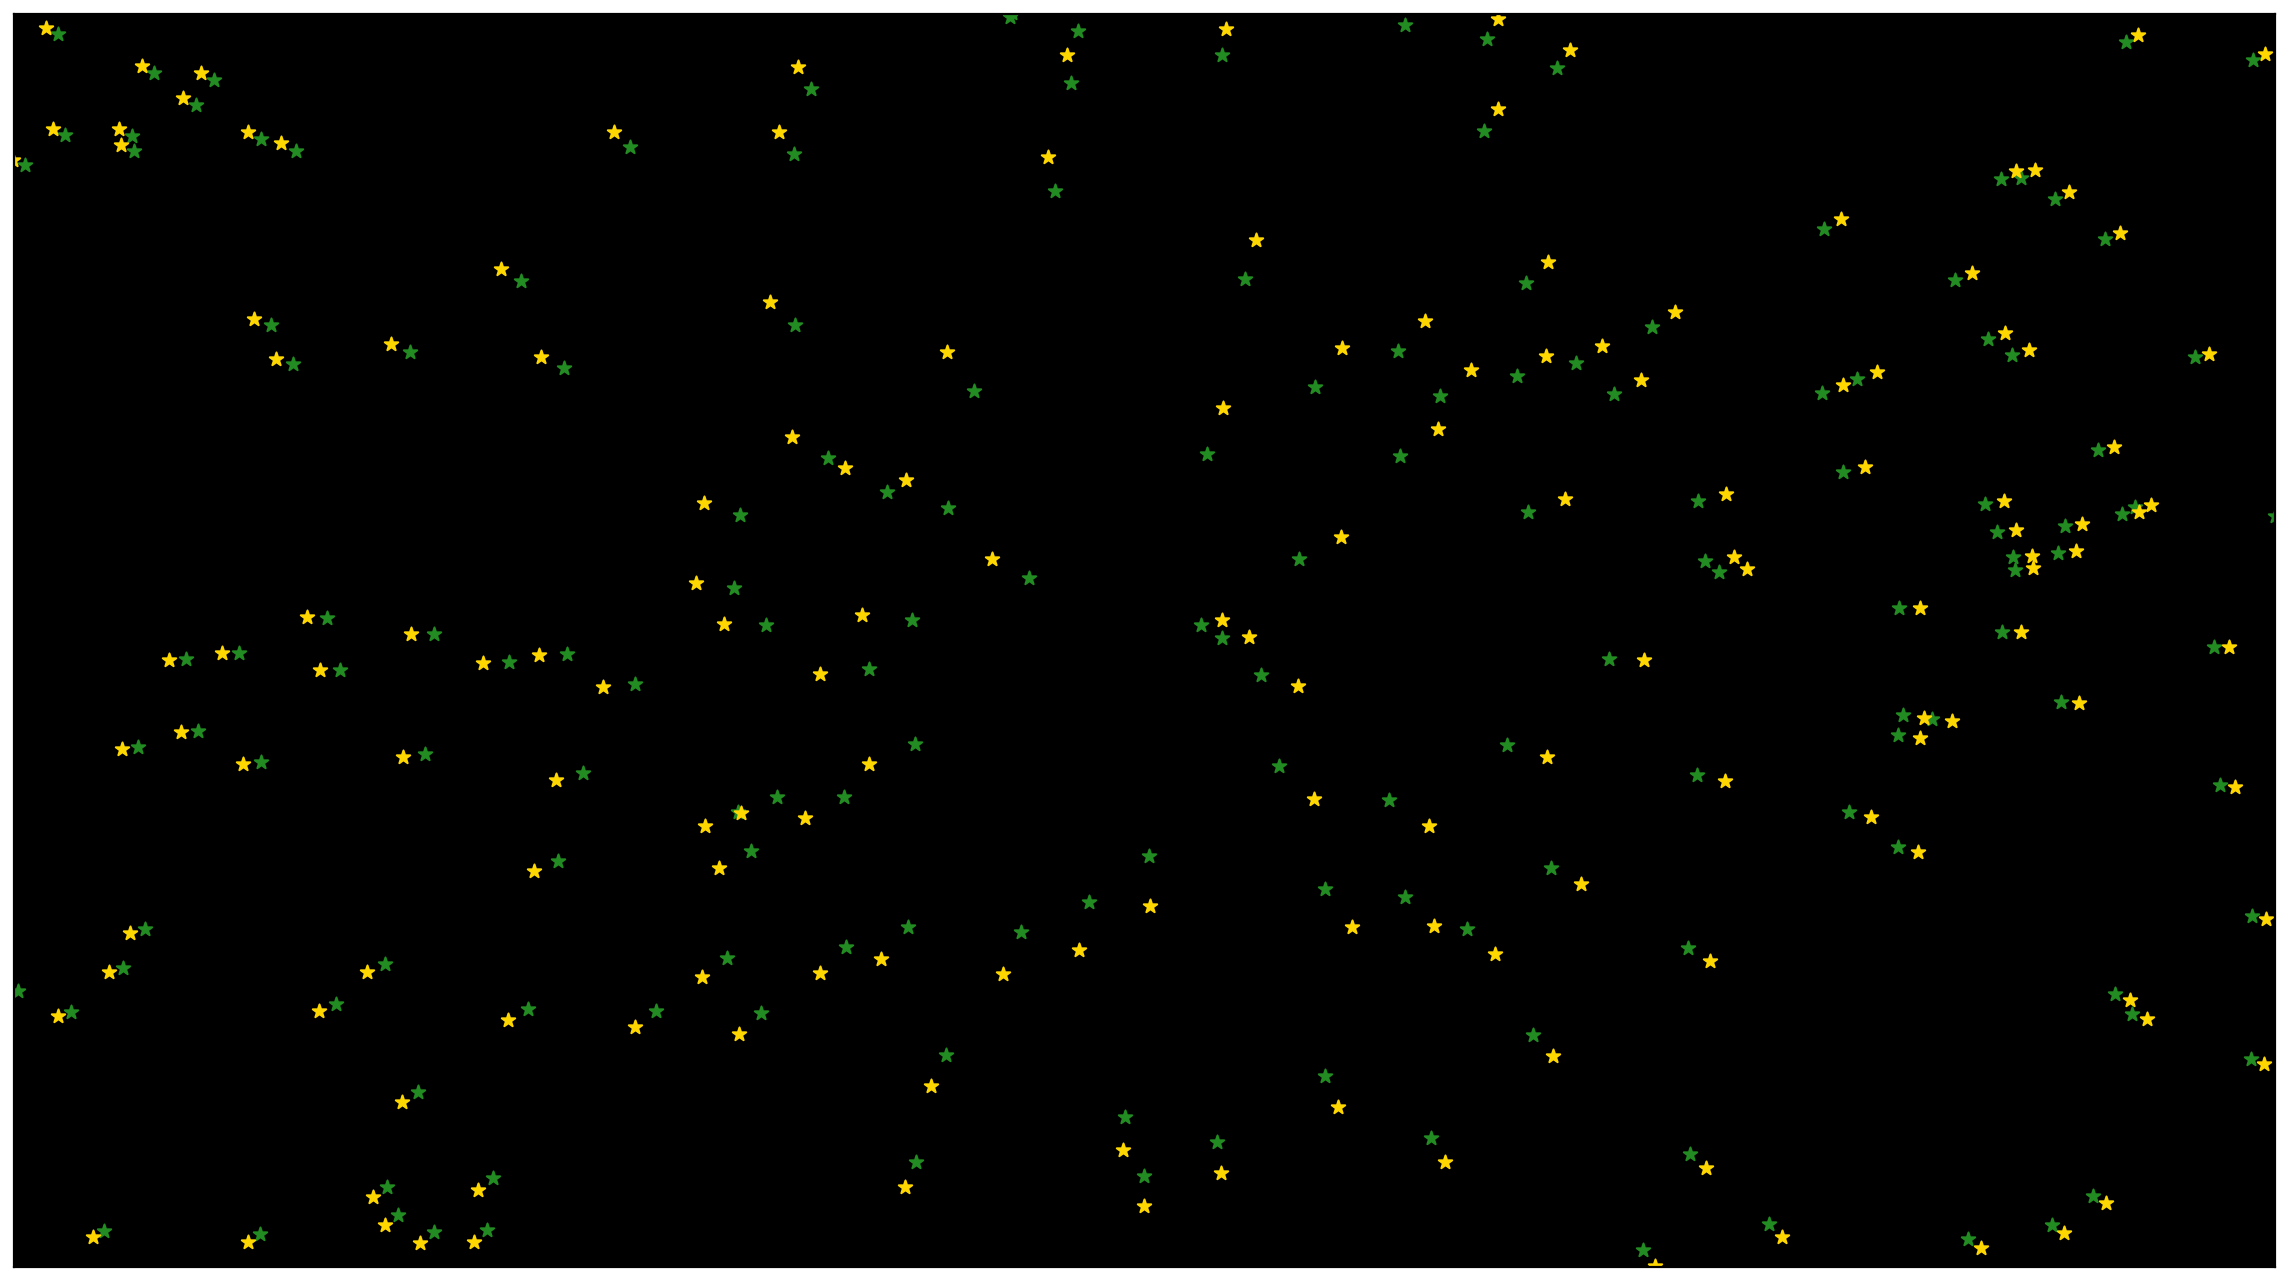

In [16]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9]
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':50}


anim = ds.animation(dt=10, 
                    pos_l=np.array([[-0,0]]), v_l=np.array([[50,0]]) * Kmps, R_l=[0.1 * pc], M_l=[4e5 * M_s],
                    D_l=[100 * kpc], n_frames=500, arrow_mult=2000, animate=False, show_lens=False, show_vel_arrows=False, show_orig=False, show_sources=True,
                   n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs ,
            n_dens = 50,
            source_pos="random")

plt.tight_layout()
plt.savefig(output_dir + "random.pdf")

anim = ds.animation(dt=10, 
                    pos_l=np.array([[-0,0]]), v_l=np.array([[50,0]]) * Kmps, R_l=[0.1 * pc], M_l=[4e5 * M_s],
                    D_l=[100 * kpc], n_frames=500, arrow_mult=2000, animate=False, show_lens=False, show_vel_arrows=False, show_orig=True, show_sources=True,
                   n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs ,
            n_dens = 50,
            source_pos="random")

plt.tight_layout()
plt.savefig(output_dir + "random_orig.pdf")


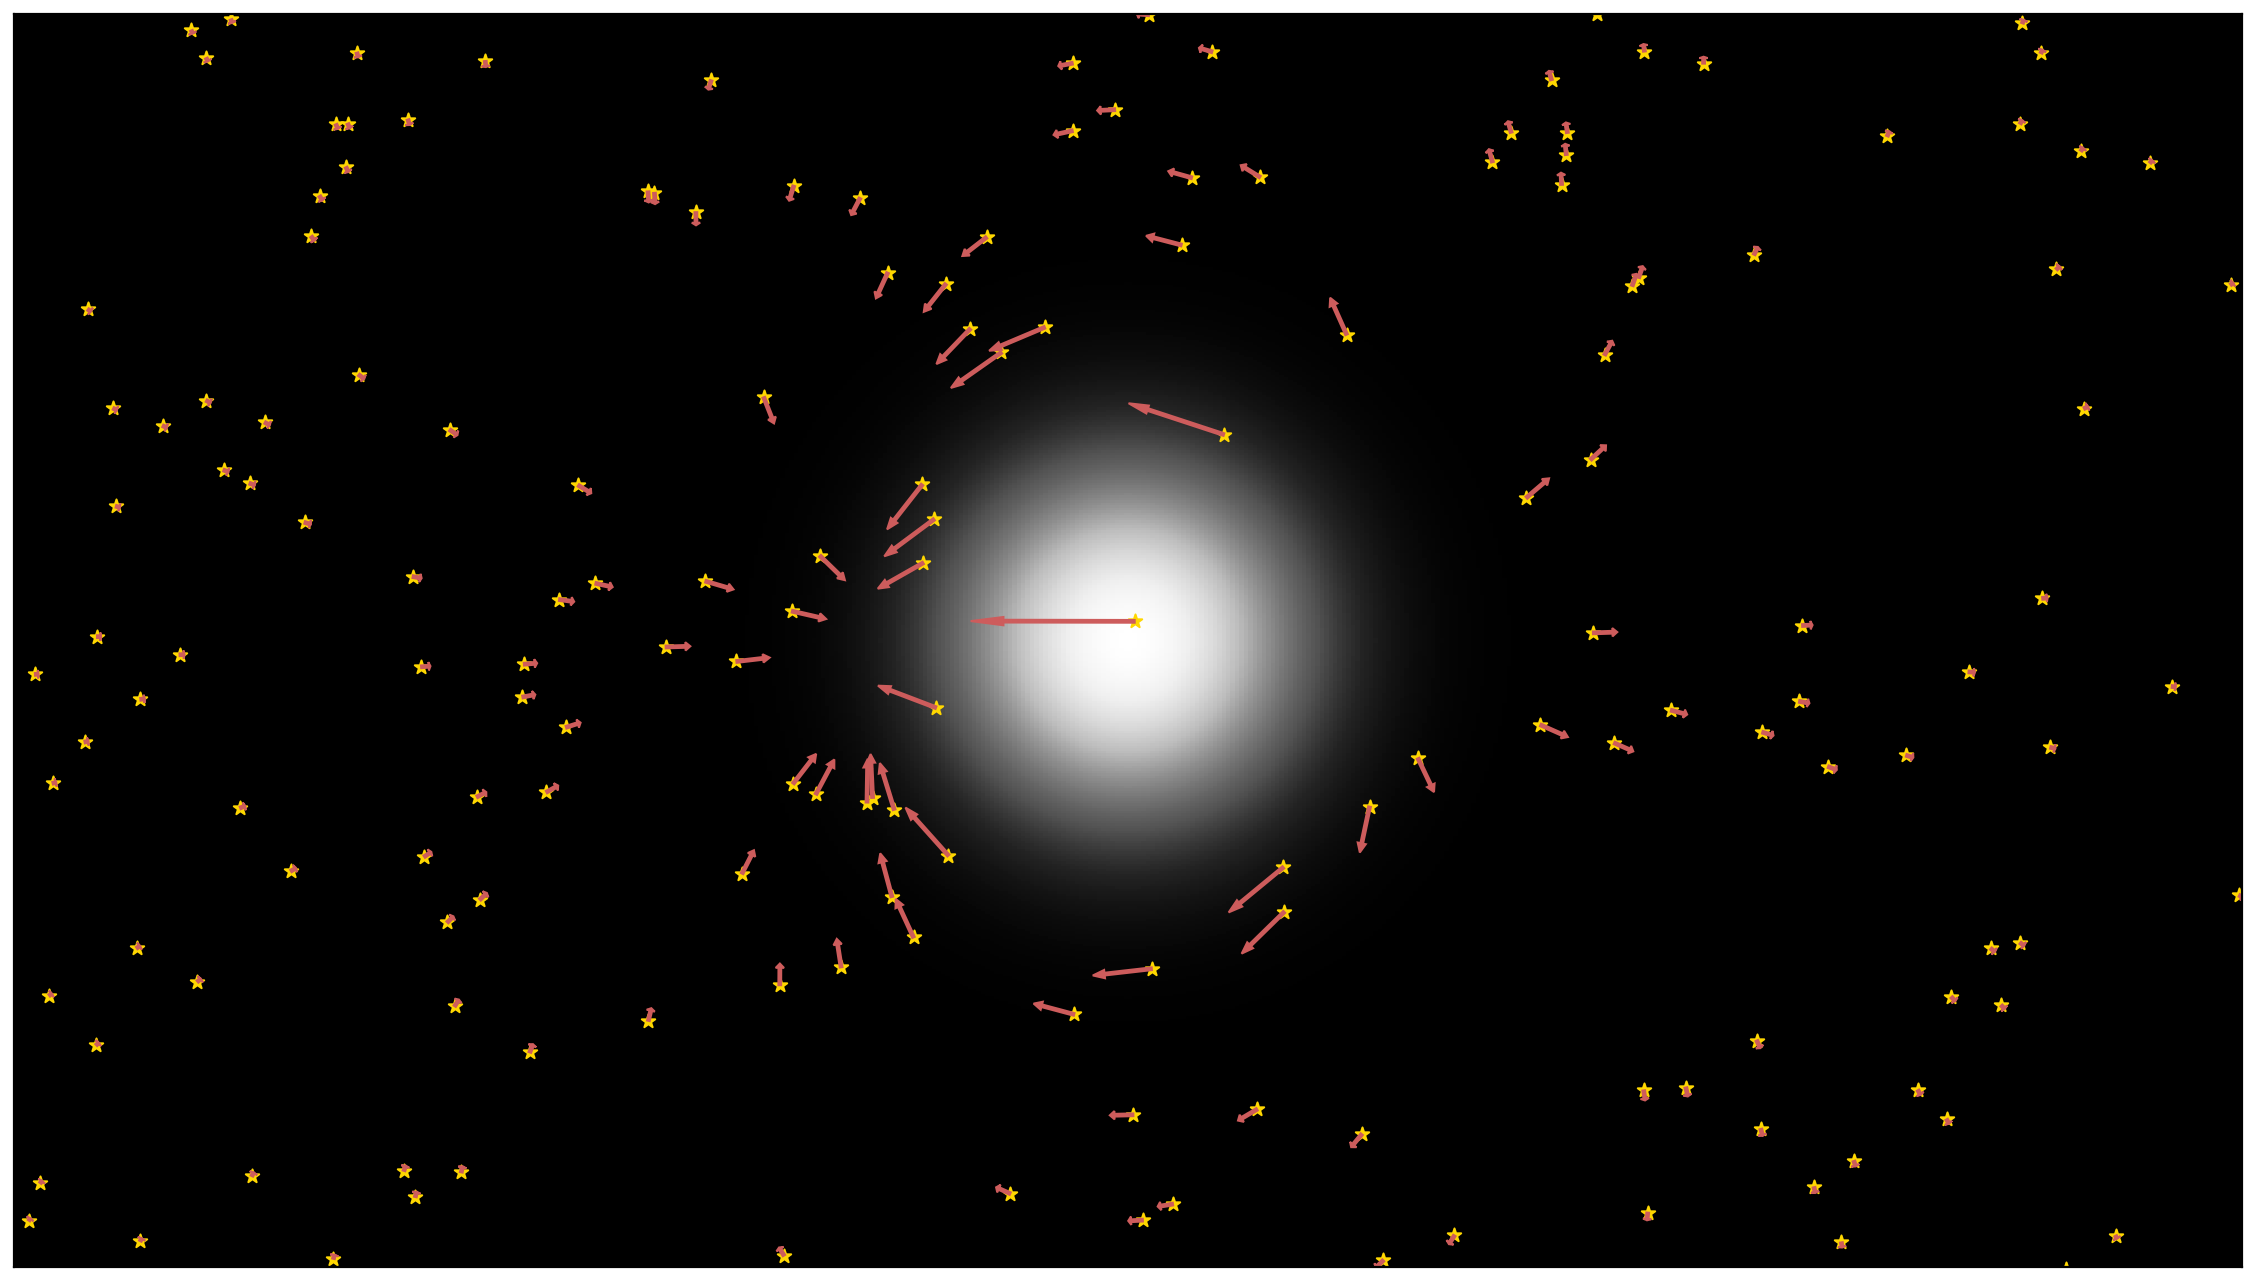

In [17]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9]
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':50}

anim = ds.animation(dt=10, 
                    pos_l=np.array([[0.,0]]), v_l=np.array([[50,0]]) * Kmps, R_l=[0.08 * pc], M_l=[5e5 * M_s],
                    D_l=[100 * kpc], n_frames=1000, arrow_mult=3000, animate=False, show_lens=True, show_vel_arrows=True, show_orig=False, show_sources=True,
                    n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs ,
                    n_dens = 50,
                    source_pos="random")

plt.tight_layout()
plt.savefig(output_dir + "velocity_random.pdf")

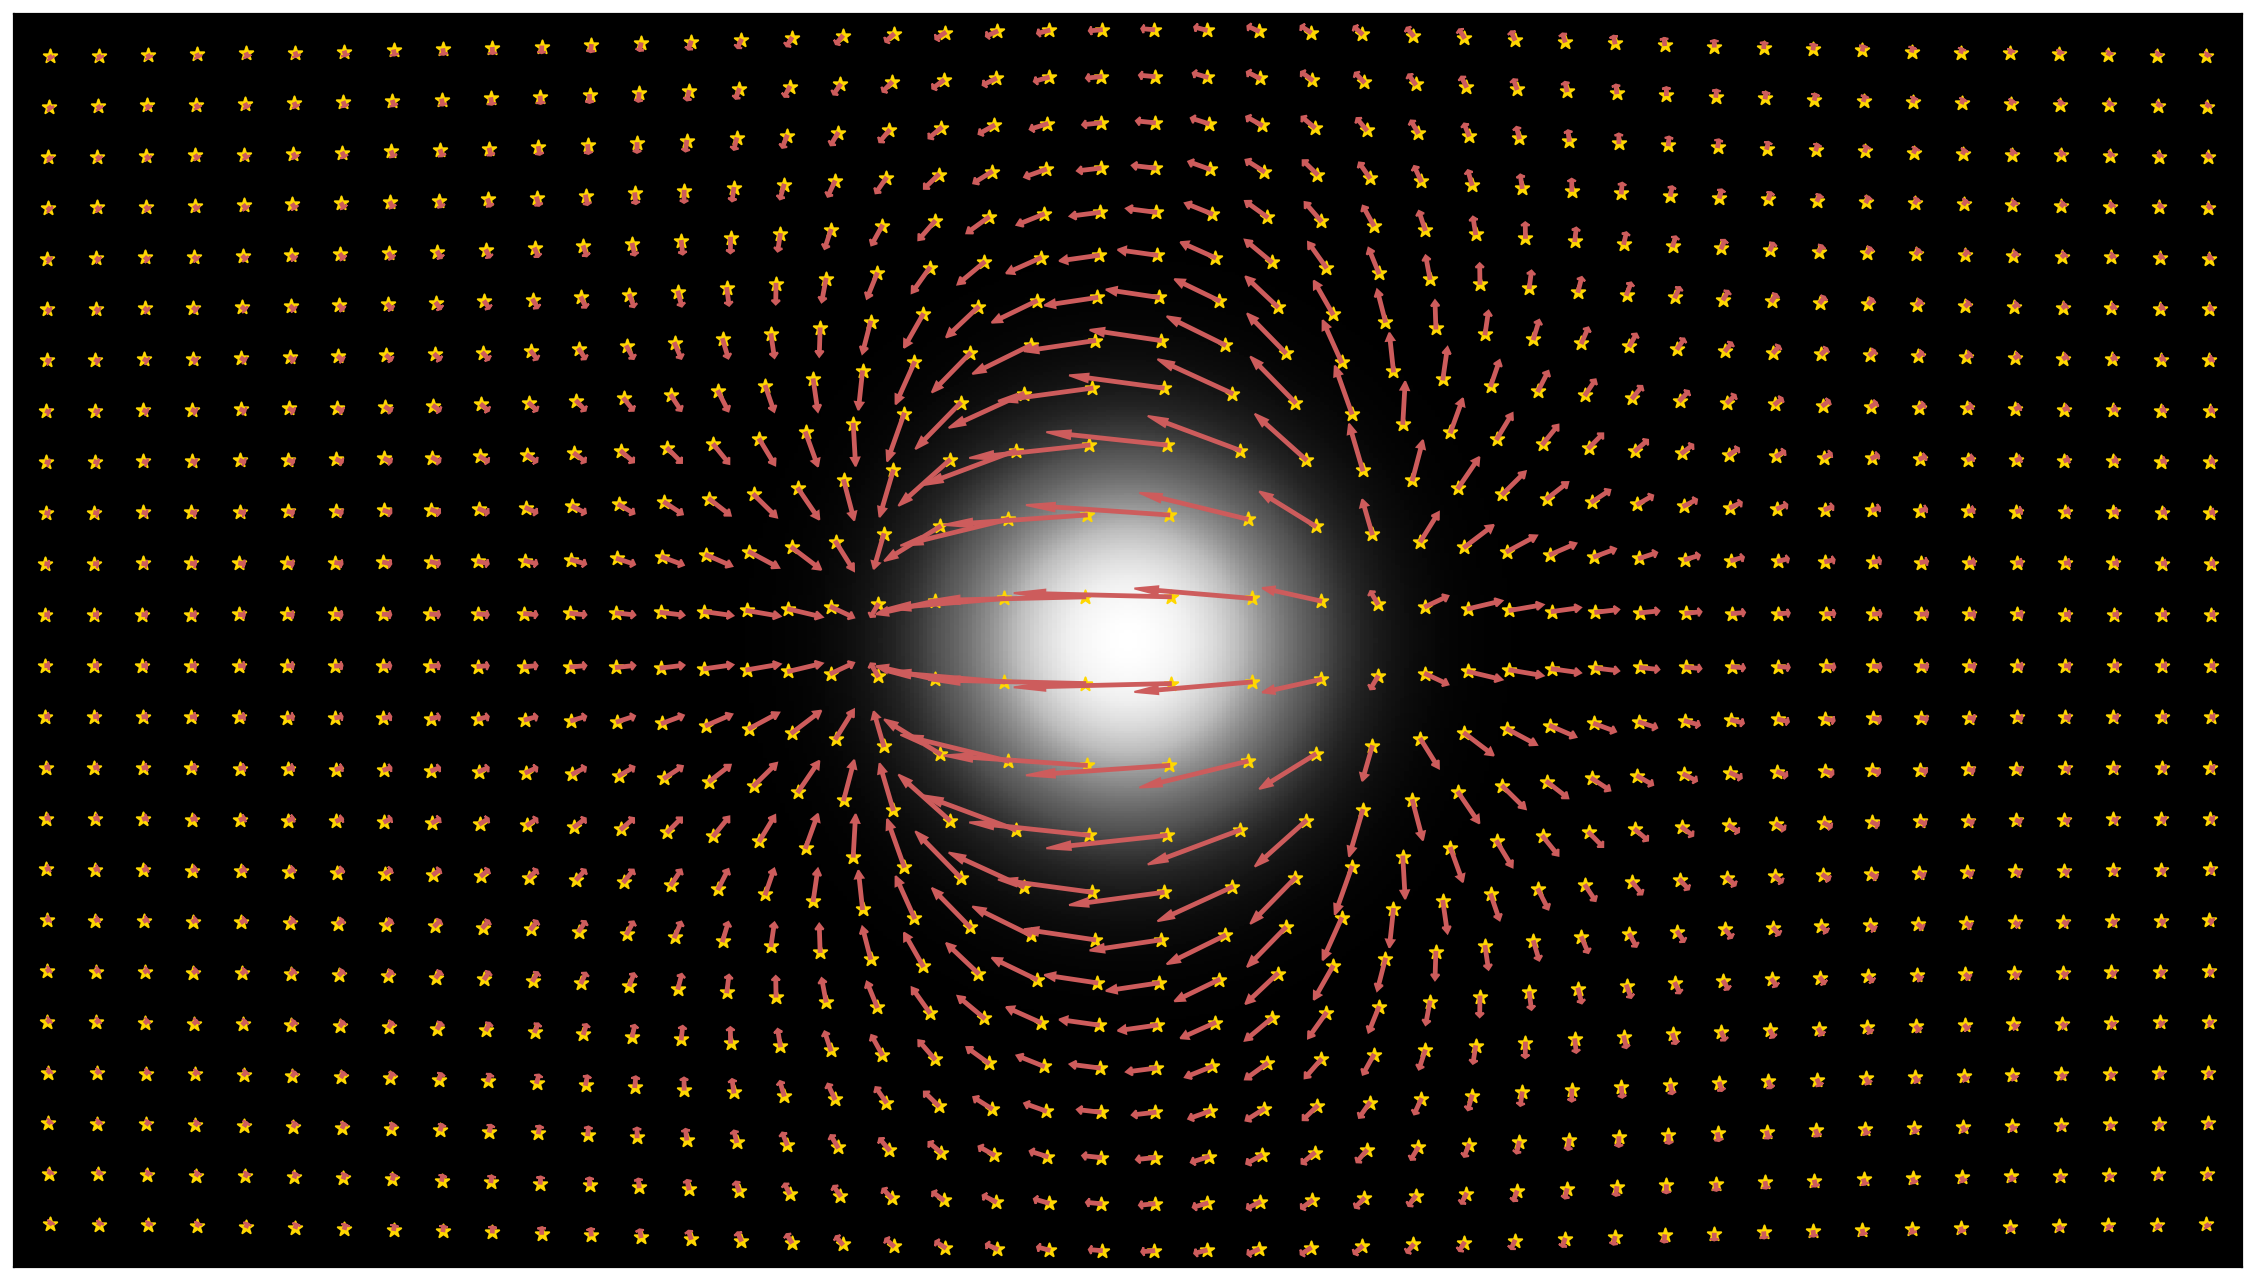

In [18]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9]
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':50}

anim = ds.animation(dt=10, 
                    pos_l=np.array([[0.,0]]), v_l=np.array([[50,0]]) * Kmps, R_l=[0.08 * pc], M_l=[5e5 * M_s],
                    D_l=[100 * kpc], n_frames=1000, arrow_mult=3000, animate=False, show_lens=True, show_vel_arrows=True, show_orig=False, show_sources=True,
                    n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs ,
                    n_dens = 200,
                    source_pos="uniform")

plt.tight_layout()
plt.savefig(output_dir + "velocity_dipole.pdf")

In [ ]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9] 
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':50}

anim = ds.animation(dt=10, 
                    pos_l=np.array([[-1.6,-0.2]]), v_l=np.array([[50,0]]) * Kmps, R_l=[0.06 * pc], M_l=[5e5 * M_s],
                    D_l=[100 * kpc], n_frames=3000, arrow_mult=2000, animate=True, show_lens=False, show_vel_arrows=False, show_orig=False, show_sources=True,
                    n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs,
                    n_dens = 50,
                    source_pos="random"
        )

# HTML(anim.to_html5_video())
anim.save(output_dir + "hidden_lens.mp4")

In [32]:
anim = ds.animation(dt=10, 
                    pos_l=np.array([[-1.6,-0.2],[-4.8,-0.2]]), v_l=np.array([[50,0],[50,0]]) * Kmps, R_l=[0.08 * pc, 0.08 * pc], M_l=[5e5 * M_s, 5e5 * M_s],
                    D_l=[100 * kpc, 100 * kpc], n_frames=3000, arrow_mult=2000, animate=True, show_lens=True, show_vel_arrows=False, show_orig=False, show_sources=True,
                    n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs,
                    n_dens = 50,
                    source_pos="random"
        )

# HTML(anim.to_html5_video())
anim.save(output_dir + "nonhidden_lens.mp4")

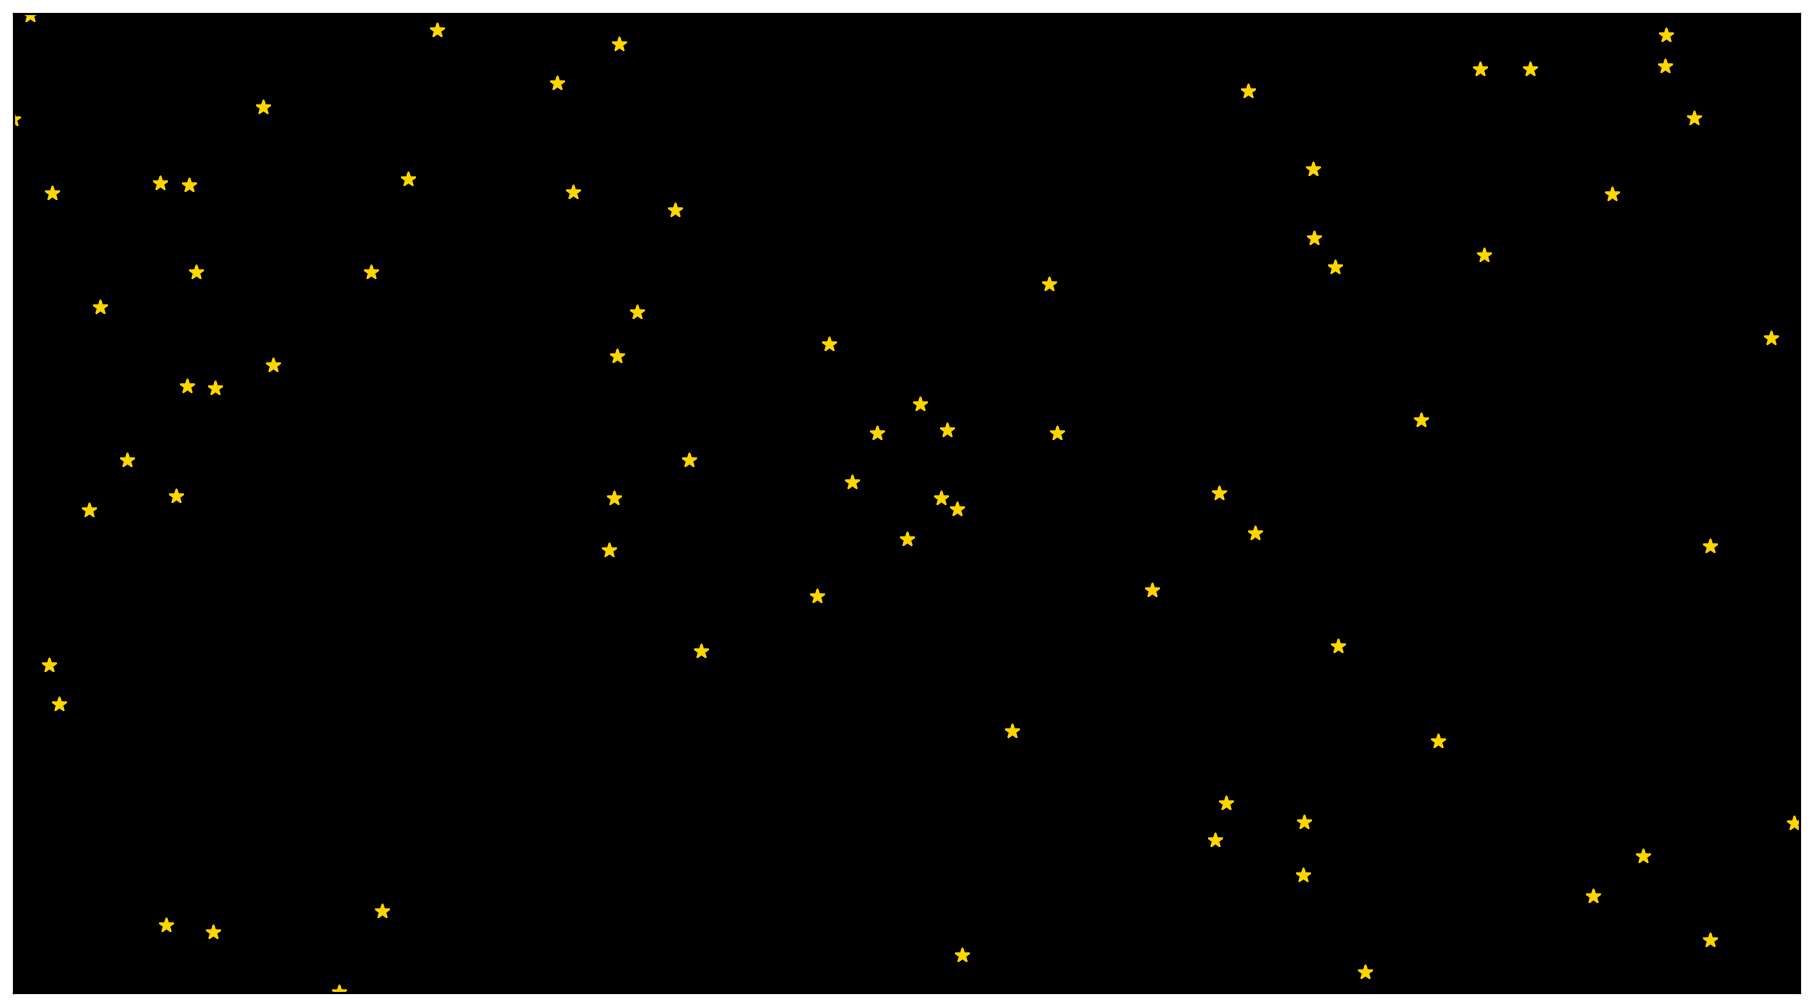

In [740]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9]
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':50}

anim = ds.animation(dt=10, 
                    pos_l=np.array([[-1.,0]]), v_l=np.array([[50,0]]) * Kmps, R_l=[0.01 * pc], M_l=[5e5 * M_s],
                    D_l=[100 * kpc], n_frames=3000, arrow_mult=2000, animate=True, show_lens=False, show_vel_arrows=False, show_orig=False, show_sources=True,
                    n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs,
                    n_dens = 25,
                    source_pos="random",
                    custom_source_pos=np.array([[-0.5,0.01], [0.1,0.01], [0.13,-0.01]]))

HTML(anim.to_html5_video())
# anim.save(output_dir + "blips_hidden.mp4")

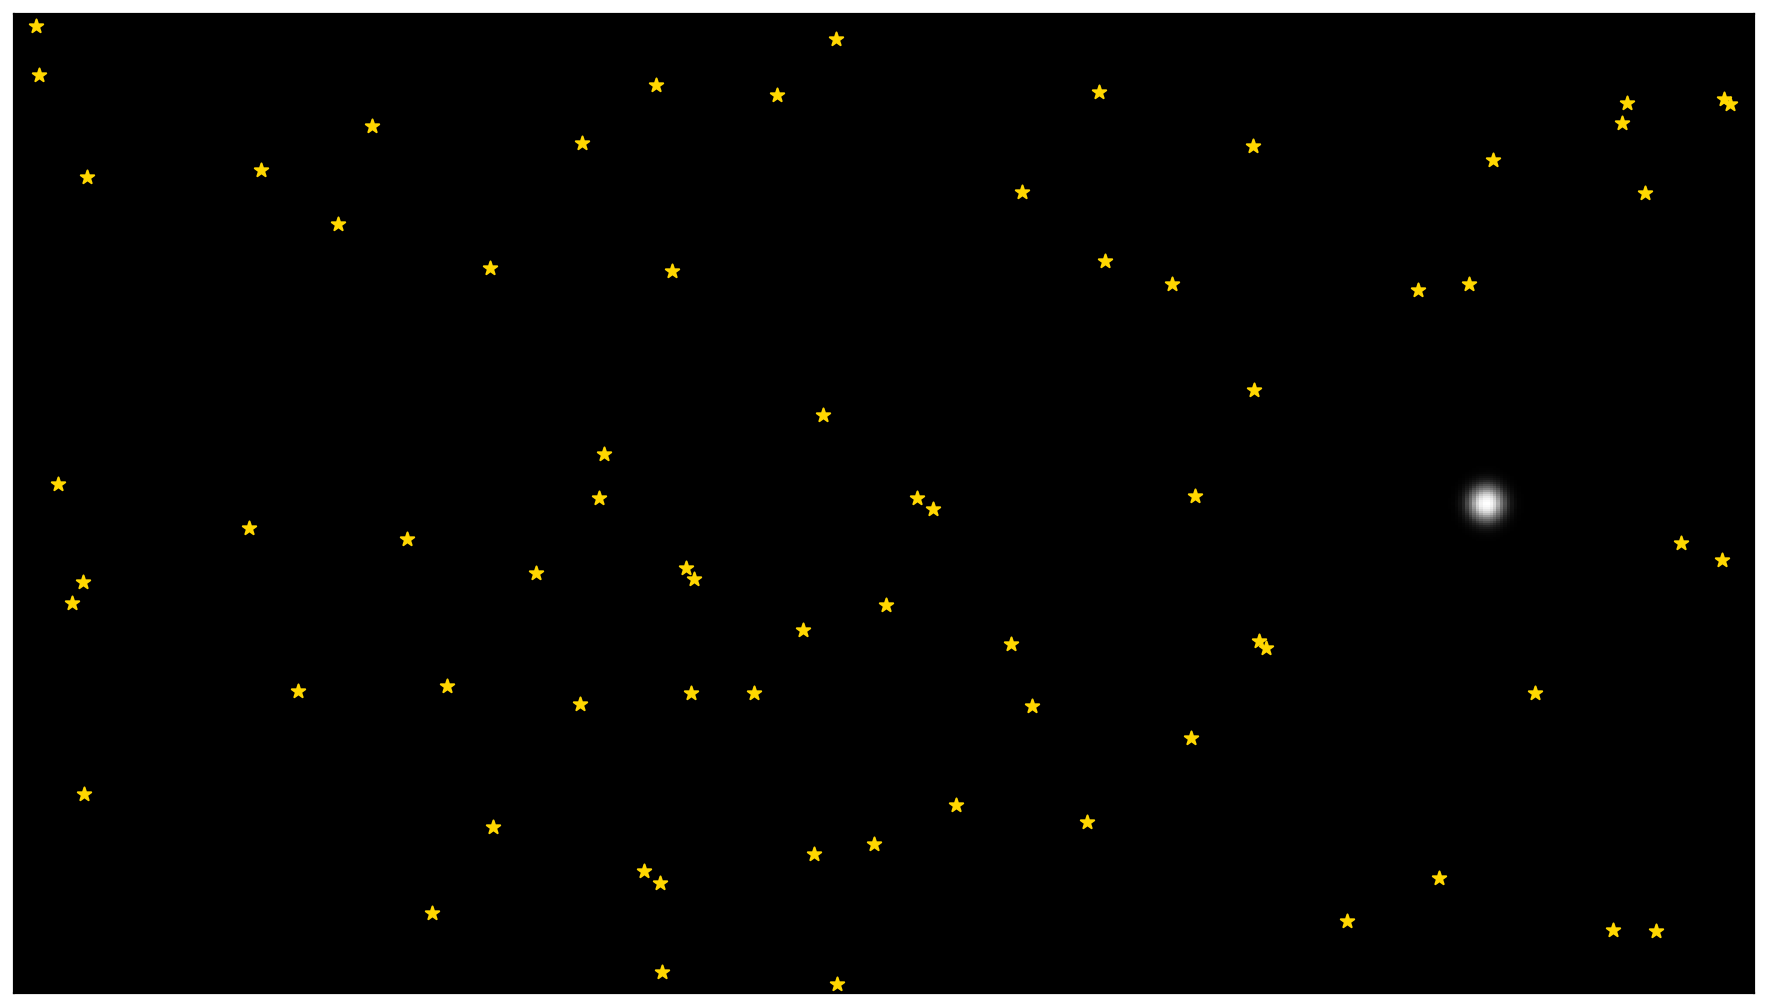

In [741]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9]
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':50}

anim = ds.animation(dt=10, 
                    pos_l=np.array([[-1.,0]]), v_l=np.array([[50,0]]) * Kmps, R_l=[0.01 * pc], M_l=[5e5 * M_s],
                    D_l=[100 * kpc], n_frames=2000, arrow_mult=2000, animate=True, show_lens=True, show_vel_arrows=False, show_orig=False, show_sources=True,
                    n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs,
                    n_dens = 25,
                    source_pos="random",
                    custom_source_pos=np.array([[-0.5,0.01], [0.1,0.01], [0.13,-0.01]]))

HTML(anim.to_html5_video())
# anim.save(output_dir + "blips.mp4")

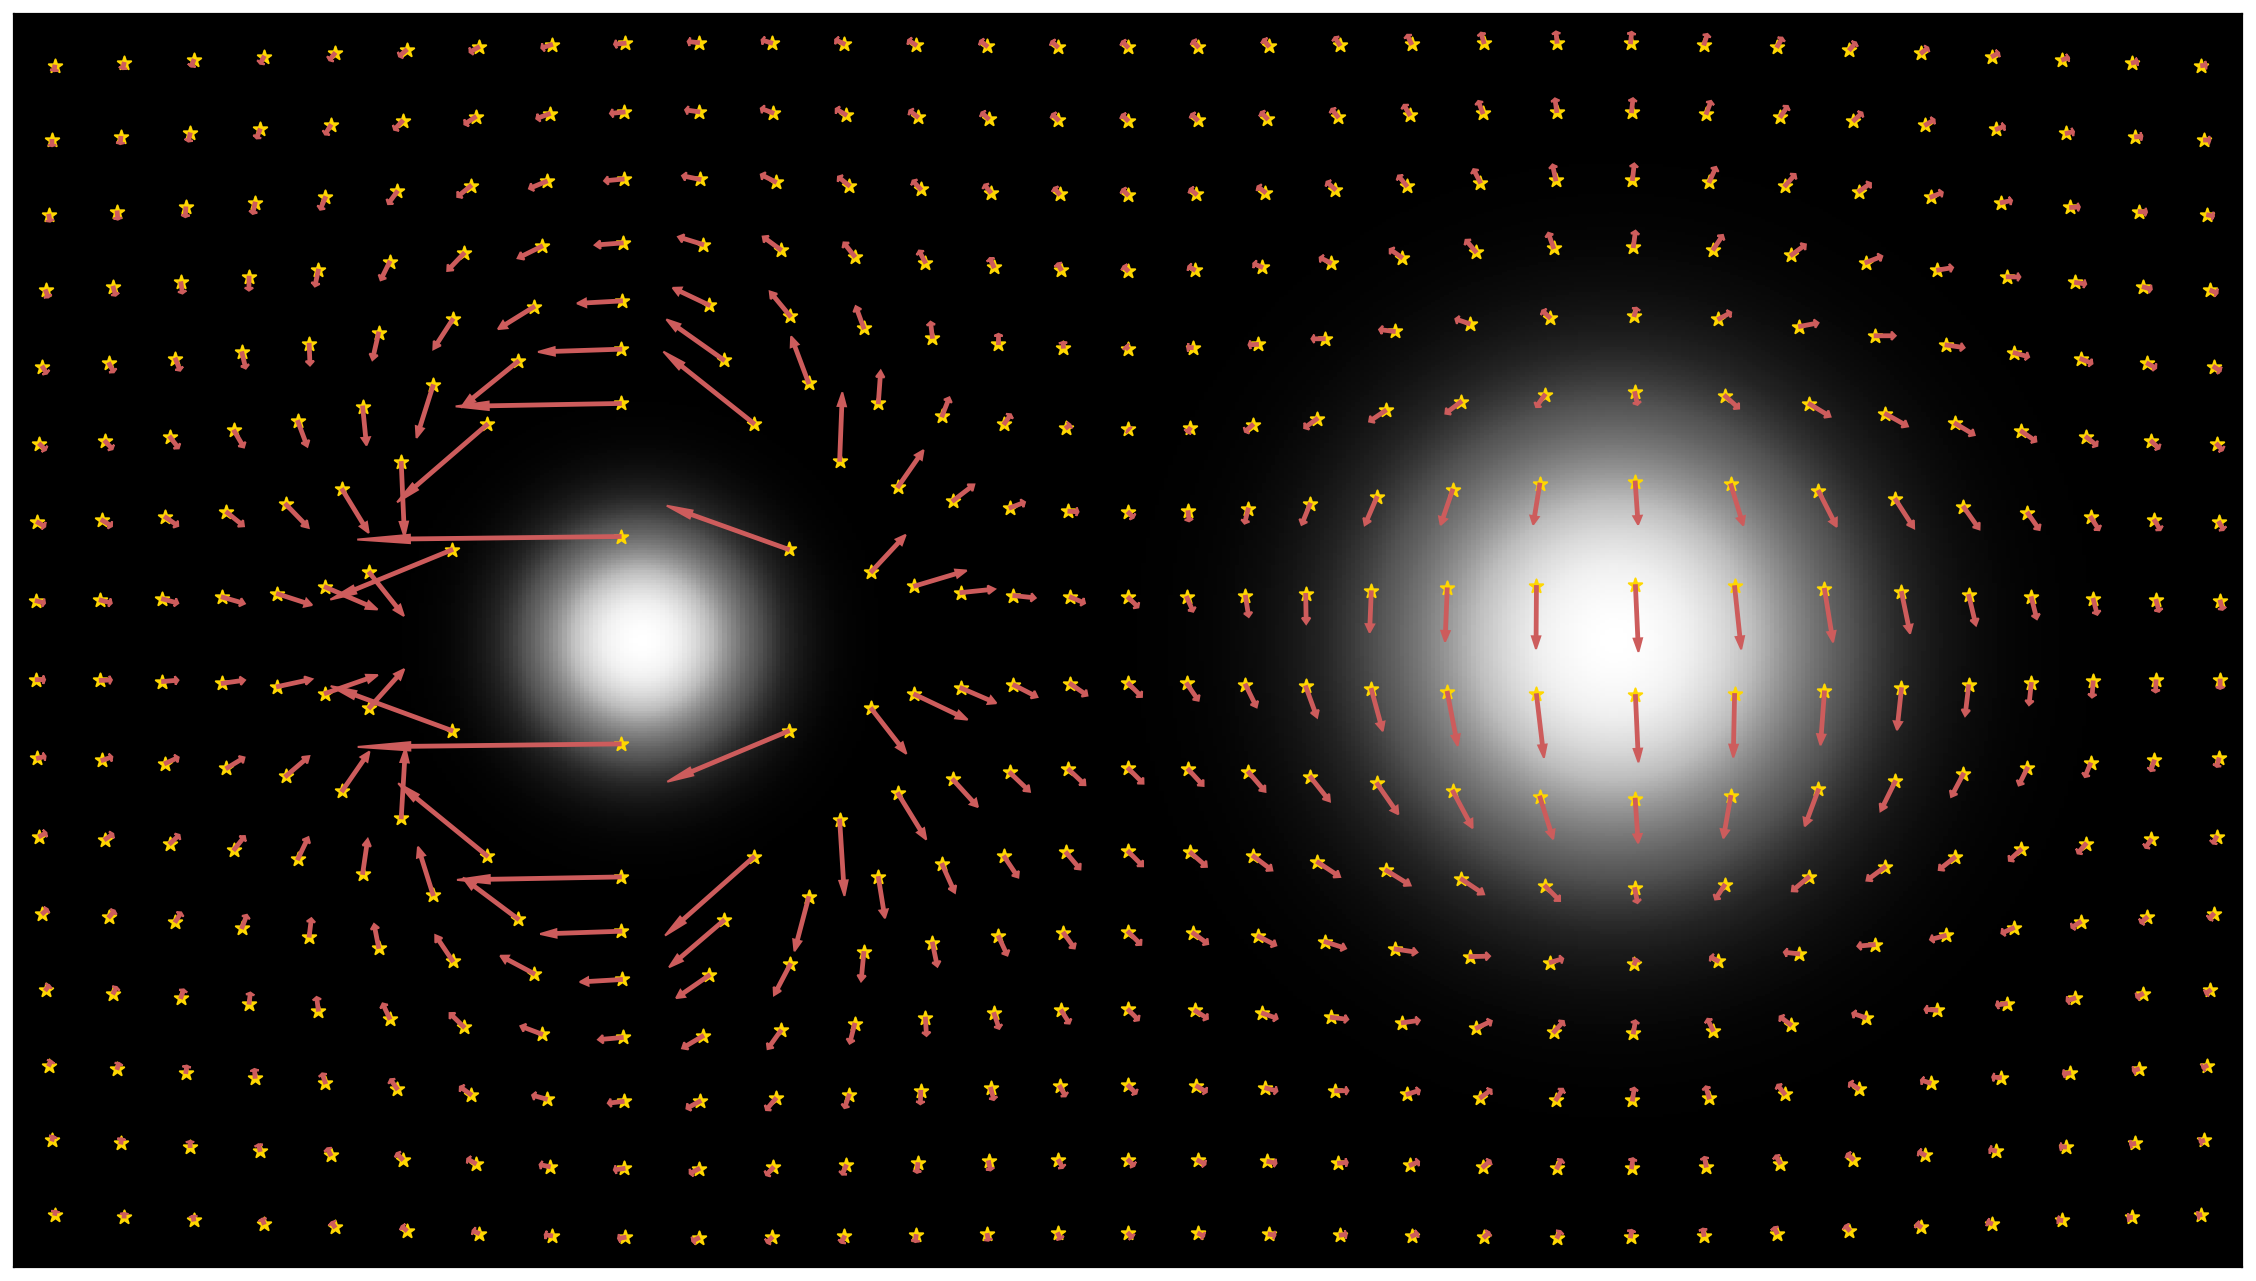

In [743]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9] 
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':50}

anim = ds.animation(dt=10, 
                    pos_l=np.array([[-0.7,0],[0.7,0]]), v_l=np.array([[50,0],[0,50]]) * Kmps, R_l=[0.05 * pc,0.1 * pc], M_l=[5e5 * M_s,5e5 * M_s],
                    D_l=[100 * kpc,100 * kpc], n_frames=1000, arrow_mult=2000, animate=False, show_lens=True, show_vel_arrows=True, show_orig=False, show_sources=True,
                    n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs,
                    n_dens = 100,
                    source_pos="uniform")

plt.tight_layout()
plt.savefig(output_dir + "size.pdf")

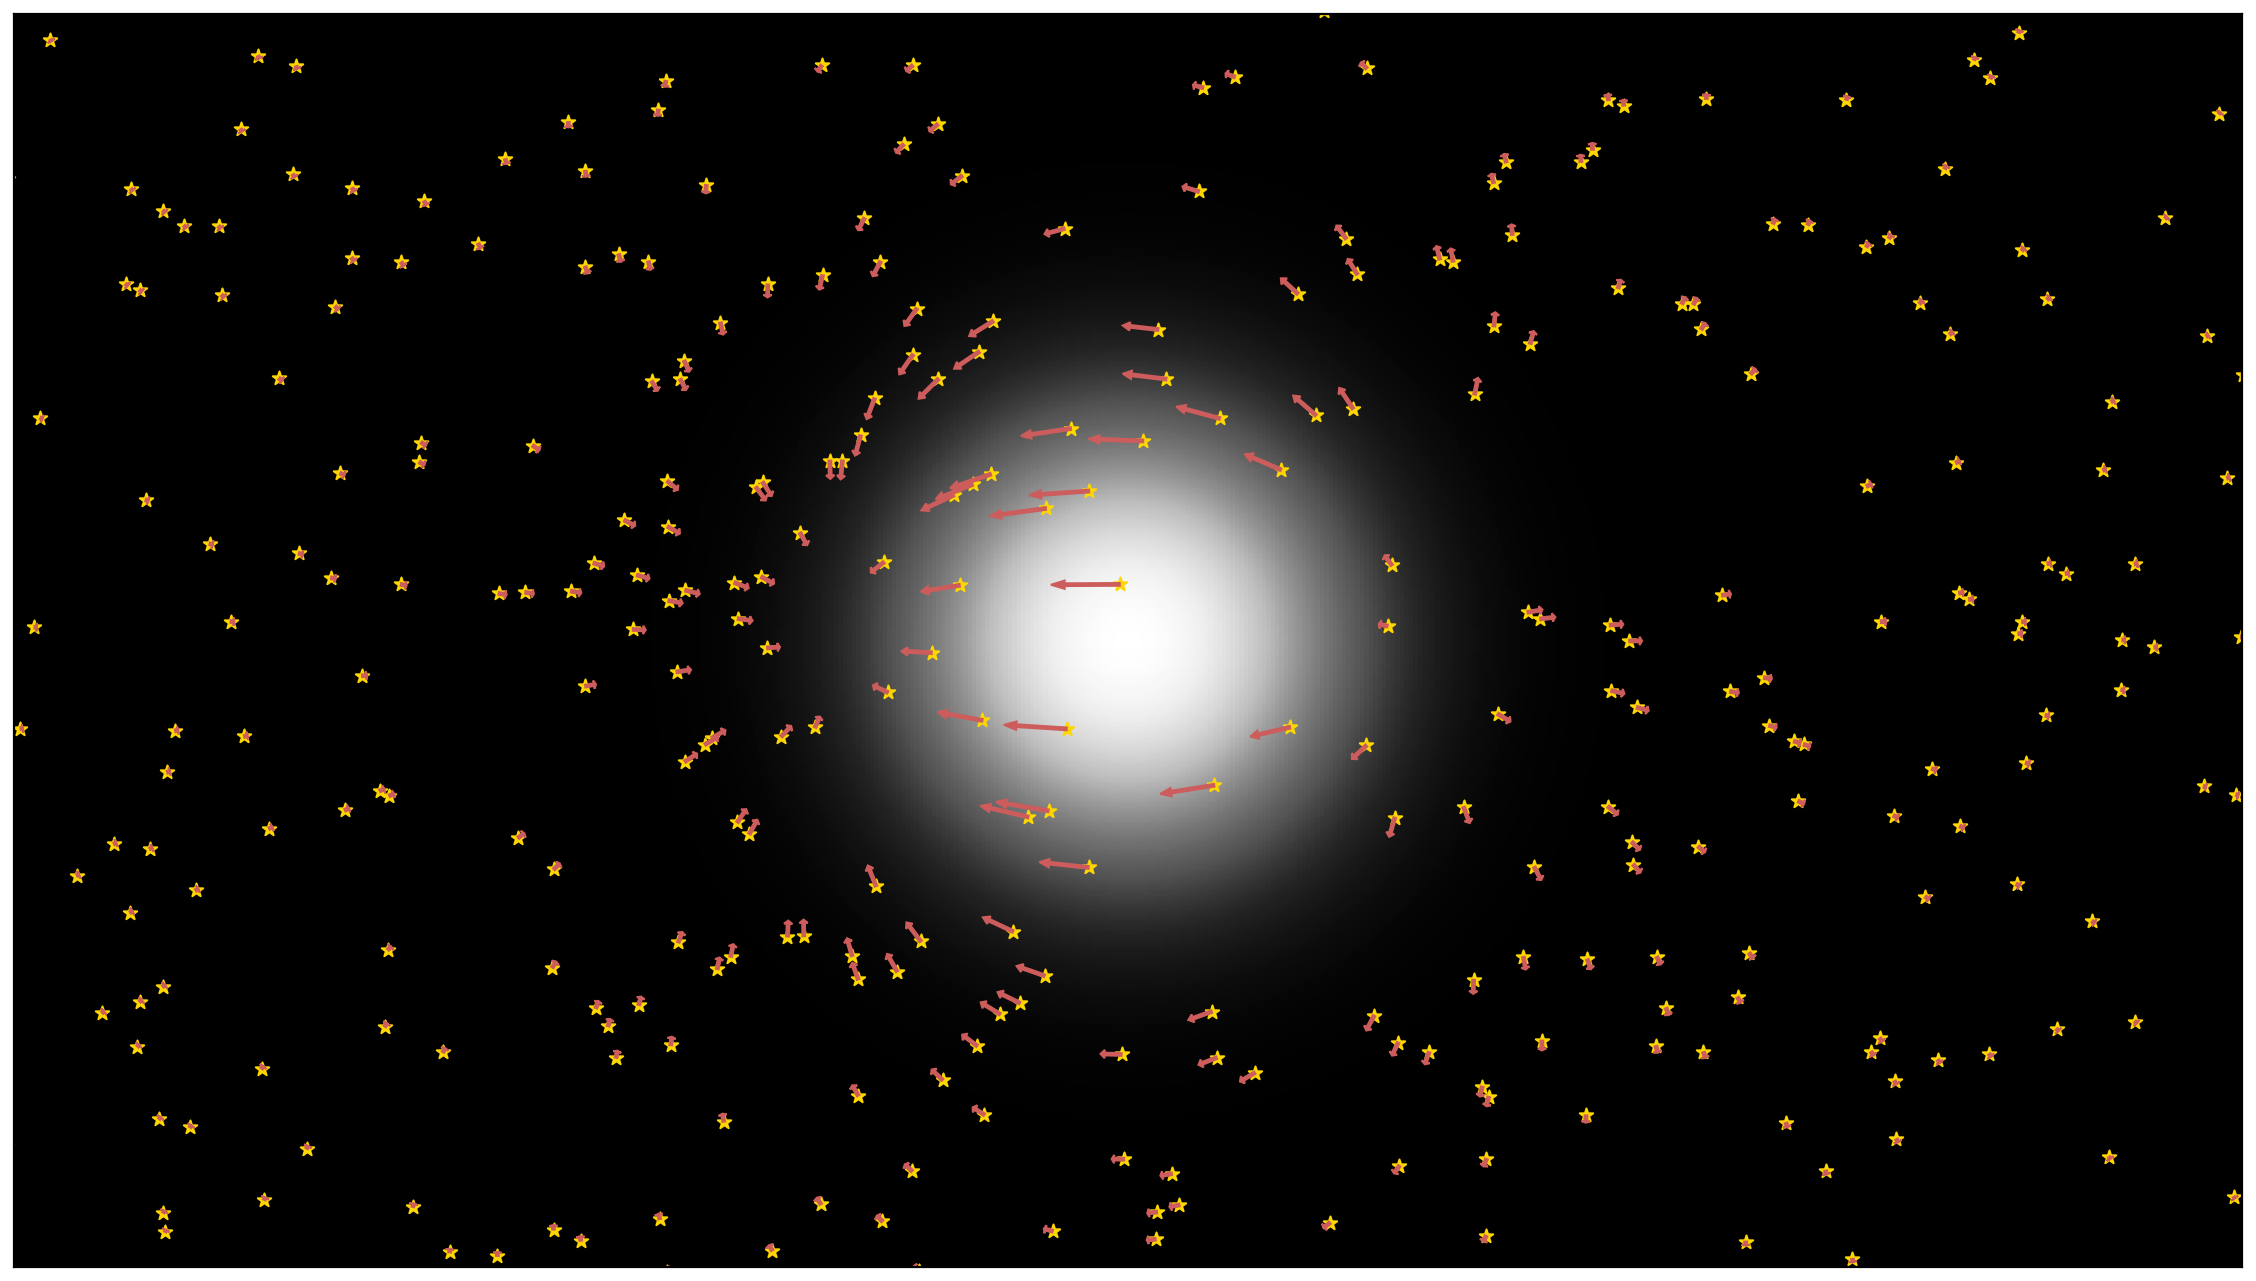

In [746]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9] 
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':50}

anim = ds.animation(dt=10, 
                    pos_l=np.array([[0,0]]), v_l=np.array([[50,0]]) * Kmps, R_l=[0.1 * pc], M_l=[5e5 * M_s],
                    D_l=[100 * kpc], n_frames=1000, arrow_mult=2000, animate=False, show_lens=True, show_vel_arrows=True, show_orig=False, show_sources=True,
                    n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs,
                    n_dens = 100,
                    source_pos="random")

plt.tight_layout()
plt.savefig(output_dir + "templates.pdf")

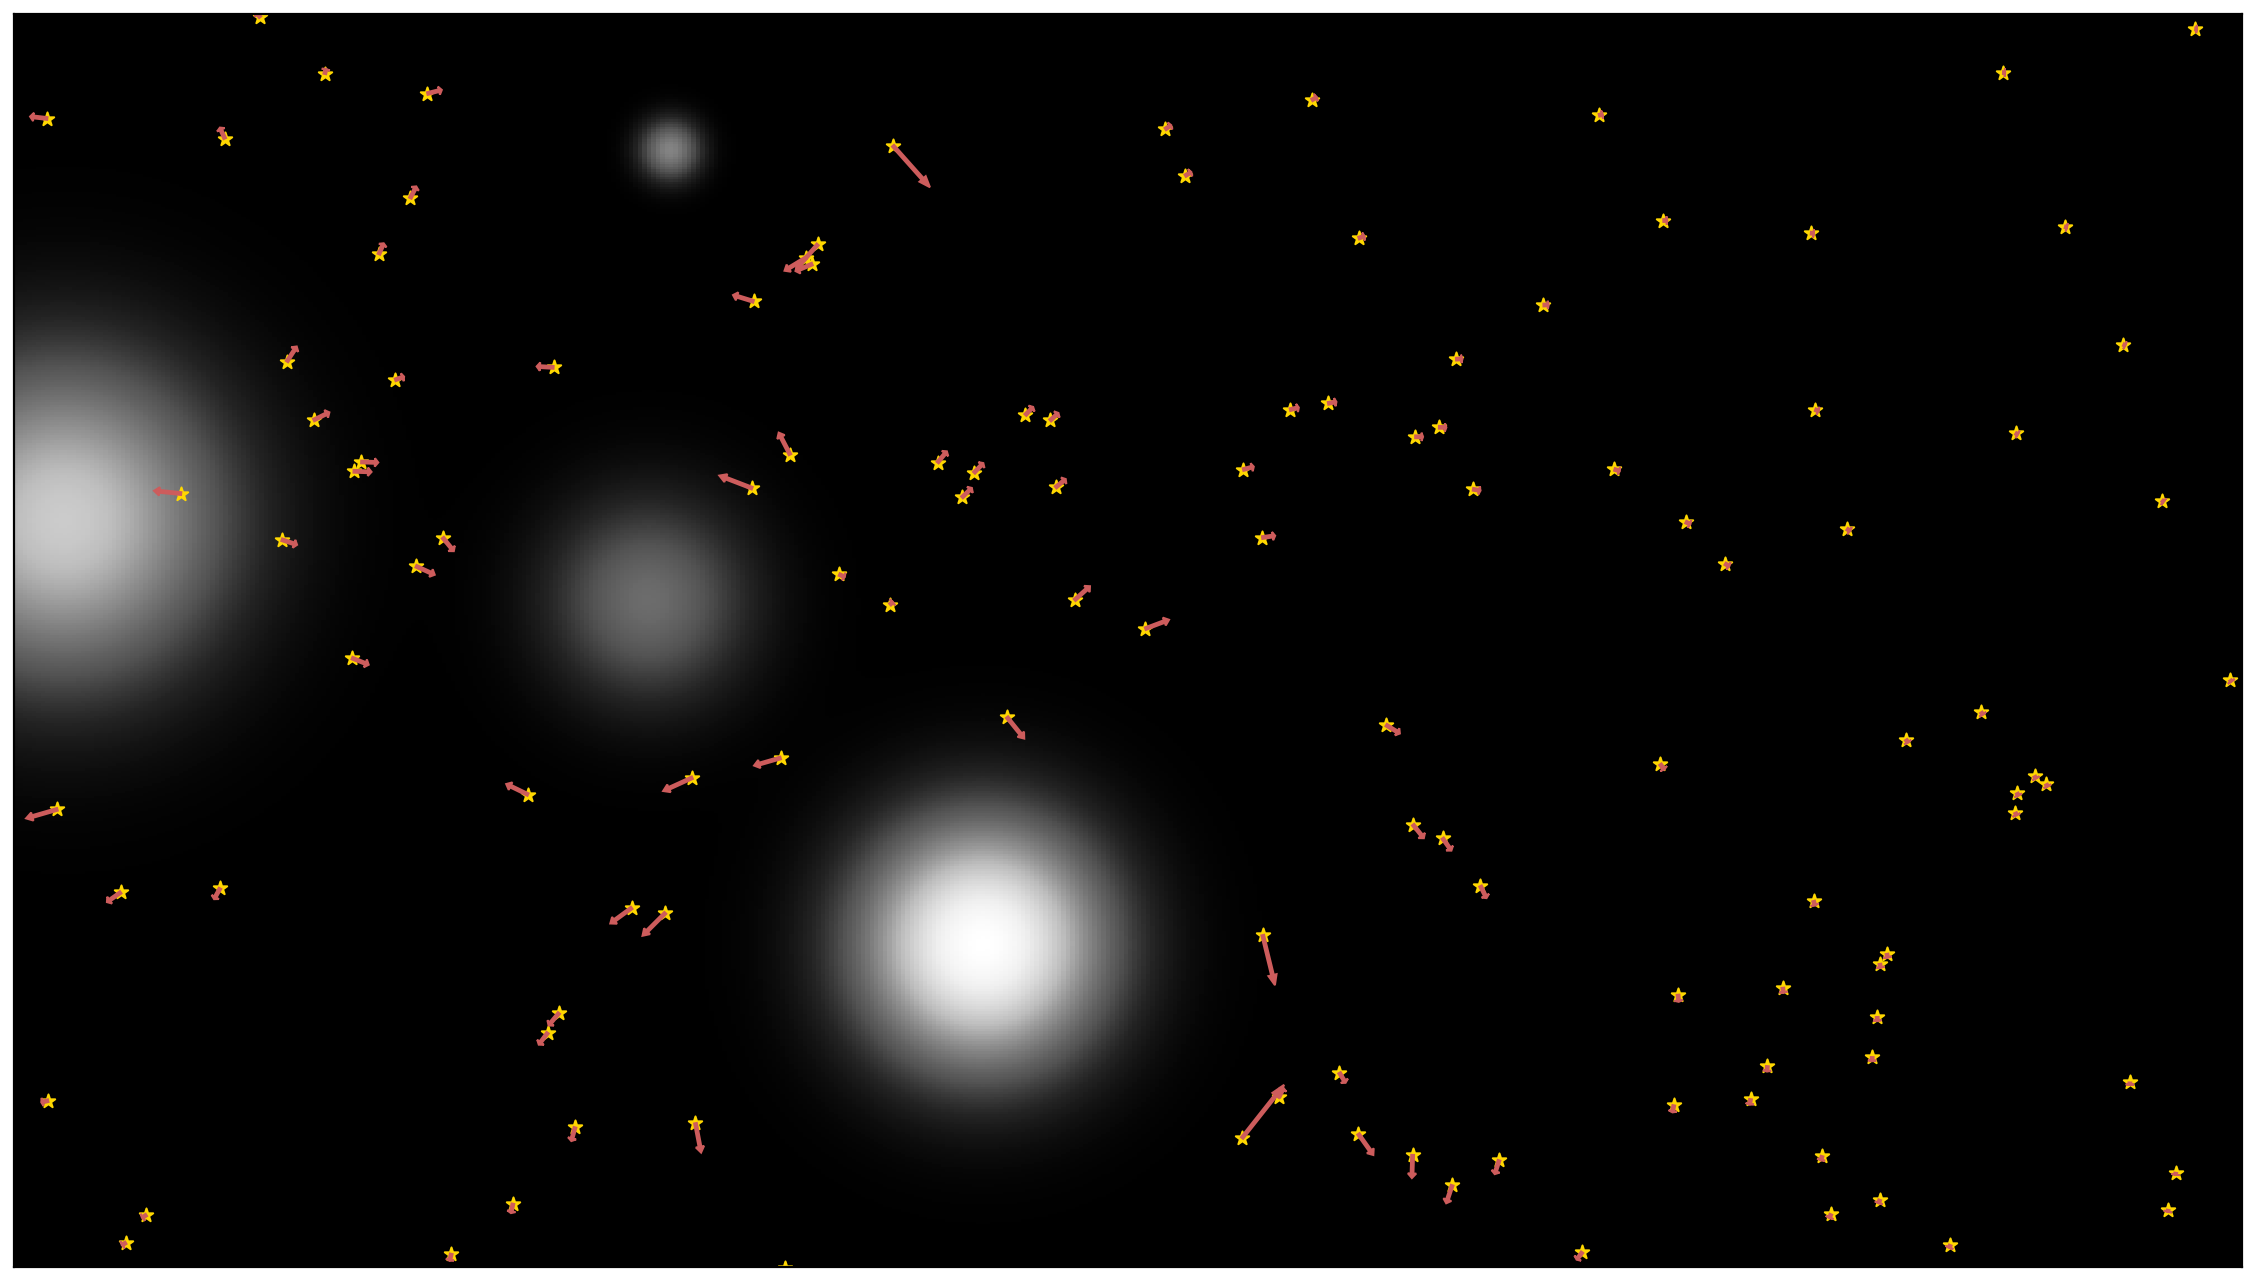

In [61]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9] 
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':50}

n_lens = 5

pos_l_ary = np.transpose([np.random.uniform(-1.6, 1.6, n_lens), np.random.uniform(-0.9, 0.9, n_lens)])
v_l_ary = np.transpose([np.random.normal(0, 20, n_lens), np.random.normal(0, 20, n_lens)]) * Kmps
R_l_ary = np.random.uniform(0, 0.1, n_lens) * pc
M_l_ary = 10 ** np.random.uniform(5, 6, n_lens) * M_s

anim = ds.animation(dt=10, 
                    pos_l=pos_l_ary, v_l=v_l_ary, R_l=R_l_ary, M_l=M_l_ary,
                    D_l=len(M_l_ary)*[100 * kpc], n_frames=1000, arrow_mult=2000, animate=False, show_lens=True, show_vel_arrows=True, show_orig=False, show_sources=True,
                    n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs,
                    n_dens = 50,
                    source_pos="random")

plt.tight_layout()
plt.savefig(output_dir + "correlations.pdf")

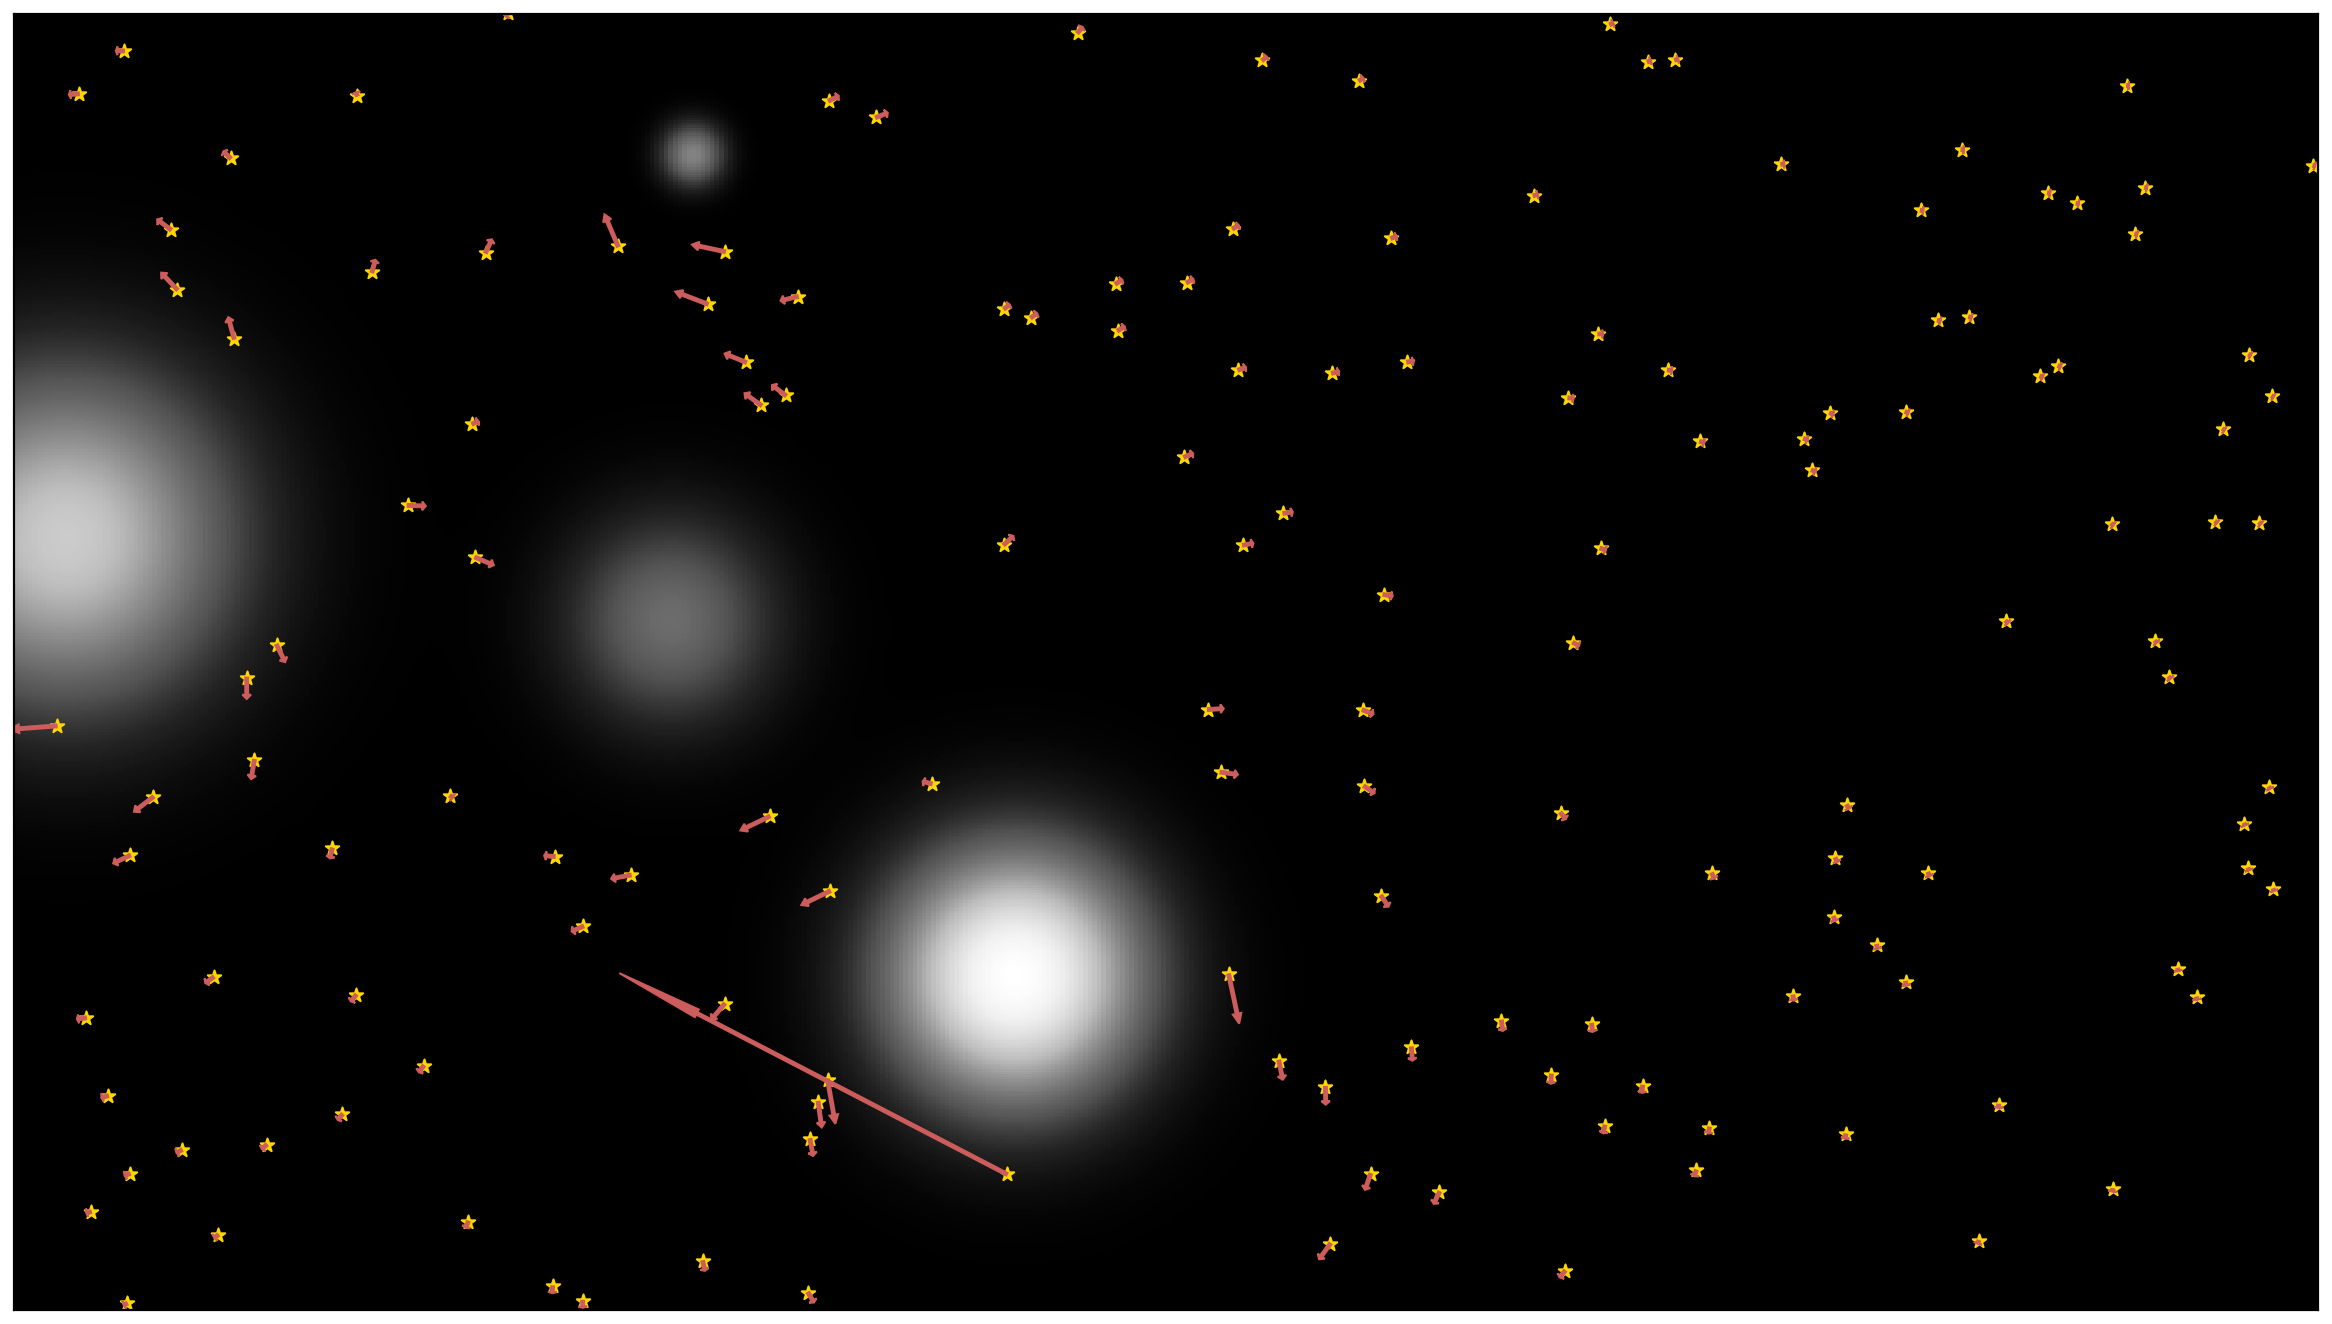

In [62]:
anim = ds.animation(dt=10, 
                    pos_l=pos_l_ary, v_l=v_l_ary, R_l=R_l_ary, M_l=M_l_ary,
                    D_l=len(M_l_ary)*[100 * kpc], n_frames=3000, arrow_mult=2000, animate=True, show_lens=True, show_vel_arrows=True, show_orig=False, show_sources=True,
                    n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs,
                    n_dens = 50,
                    source_pos="random")

# HTML(anim.to_html5_video())
# anim.save(output_dir + "correlations.mp4")

In [63]:
anim.save(output_dir + "correlations.mp4")

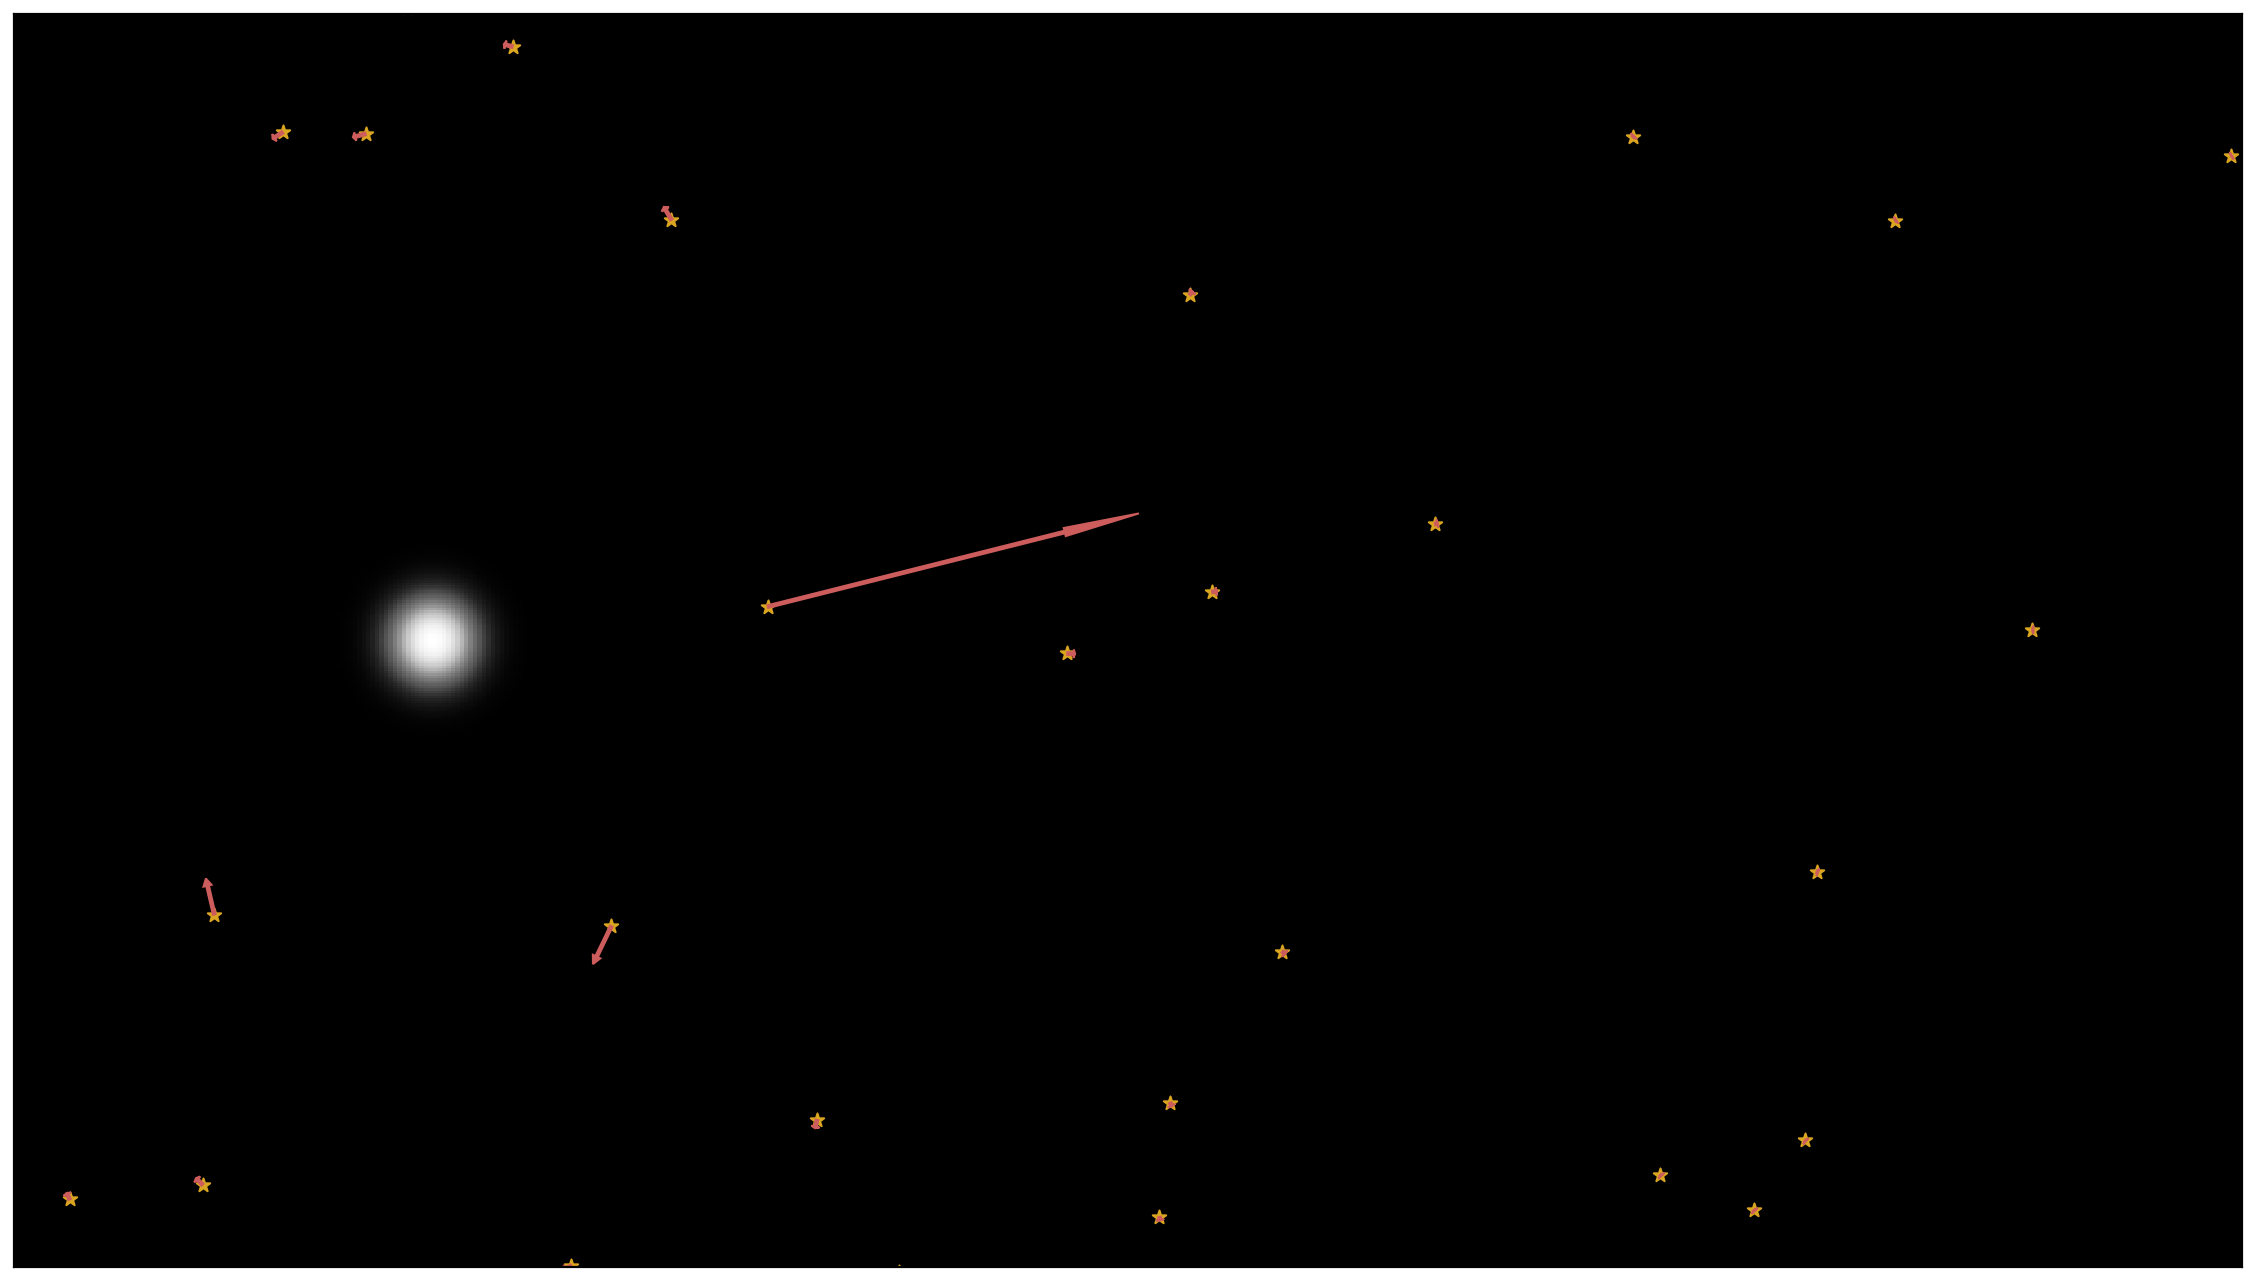

In [762]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9] 
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'goldenrod','s':50}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':50}

anim = ds.animation(dt=10, 
                    pos_l=np.array([[-1.,0]]), v_l=np.array([[50,0]]) * Kmps, R_l=[0.02 * pc], M_l=[5e5 * M_s],
                    D_l=[100 * kpc], n_frames=2000, arrow_mult=2000, animate=False, show_lens=True, show_vel_arrows=True, show_orig=False, show_sources=True,
                    n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs,
                    n_dens = 10,
                    source_pos="random",
                    custom_source_pos=np.array([[-0.9,0.01]]))

plt.tight_layout()
plt.savefig(output_dir + "outliers.pdf")

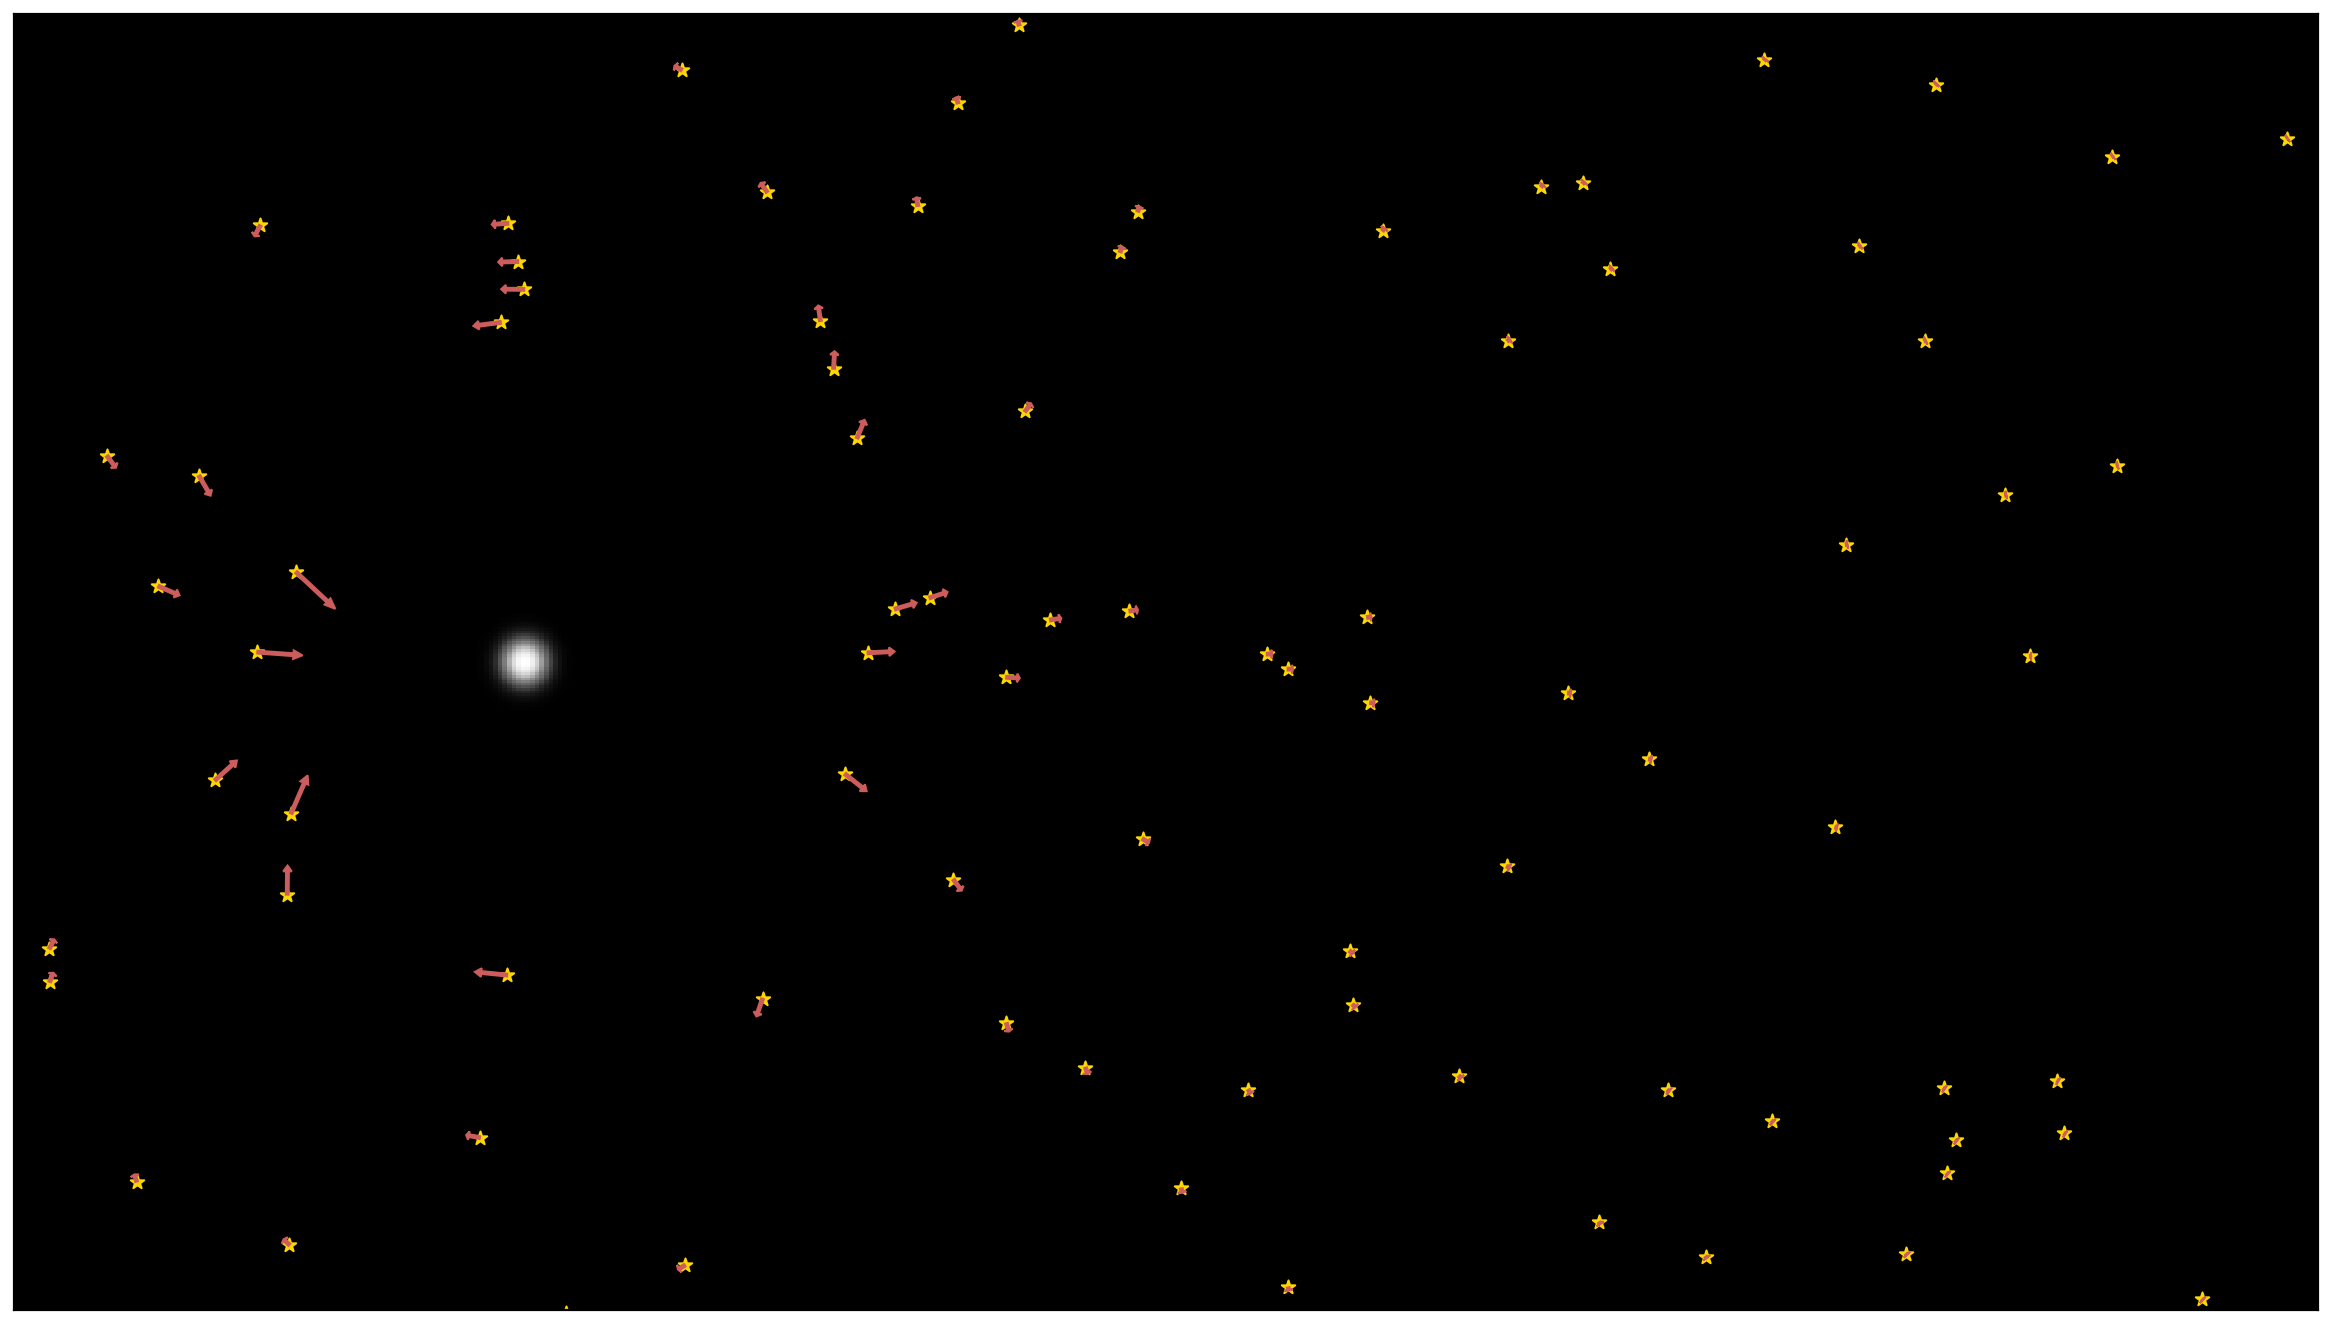

In [51]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9]
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':50}

anim = ds.animation(dt=10, 
                    pos_l=np.array([[-1.,0]]), v_l=np.array([[50,0]]) * Kmps, R_l=[0.01 * pc], M_l=[5e5 * M_s],
                    D_l=[100 * kpc], n_frames=100, arrow_mult=2000, animate=True, show_lens=True, show_vel_arrows=True, show_orig=False, show_sources=True,
                    n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs,
                    n_dens = 25,
                    source_pos="random",
                    custom_source_pos=np.array([[-0.5,0.01], [0.1,0.01], [0.13,-0.01]]))

HTML(anim.to_html5_video())
# anim.save(output_dir + "blips.mp4")

In [70]:
# anim.save(output_dir + "banner.gif", writer='imagemagick', dpi=300)

In [65]:
import imageio
import os, sys

class TargetFormat(object):
    GIF = ".gif"
    MP4 = ".mp4"
    AVI = ".avi"

def convertFile(inputpath, targetFormat):
    """Reference: http://imageio.readthedocs.io/en/latest/examples.html#convert-a-movie"""
    outputpath = os.path.splitext(inputpath)[0] + targetFormat
    print("converting\r\n\t{0}\r\nto\r\n\t{1}".format(inputpath, outputpath))

    reader = imageio.get_reader(inputpath)
    fps = reader.get_meta_data()['fps']

    writer = imageio.get_writer(outputpath, fps=fps)
    for i,im in enumerate(reader):
        sys.stdout.write("\rframe {0}".format(i))
        sys.stdout.flush()
        writer.append_data(im)
    print("\r\nFinalizing...")
    writer.close()
    print("Done.")


In [67]:
convertFile("/Users/smsharma/Desktop/correlations.mp4", TargetFormat.GIF)

converting
	/Users/smsharma/Desktop/correlations.mp4
to
	/Users/smsharma/Desktop/correlations.gif
frame 2999
Finalizing...
Done.


In [133]:
R_l_ary / pc


array([0.02550831])

../simulation/demo_sim.py:84: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ("mu", float, 1)])
../simulation/demo_sim.py:130: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ("v_y", float, 1)])


0


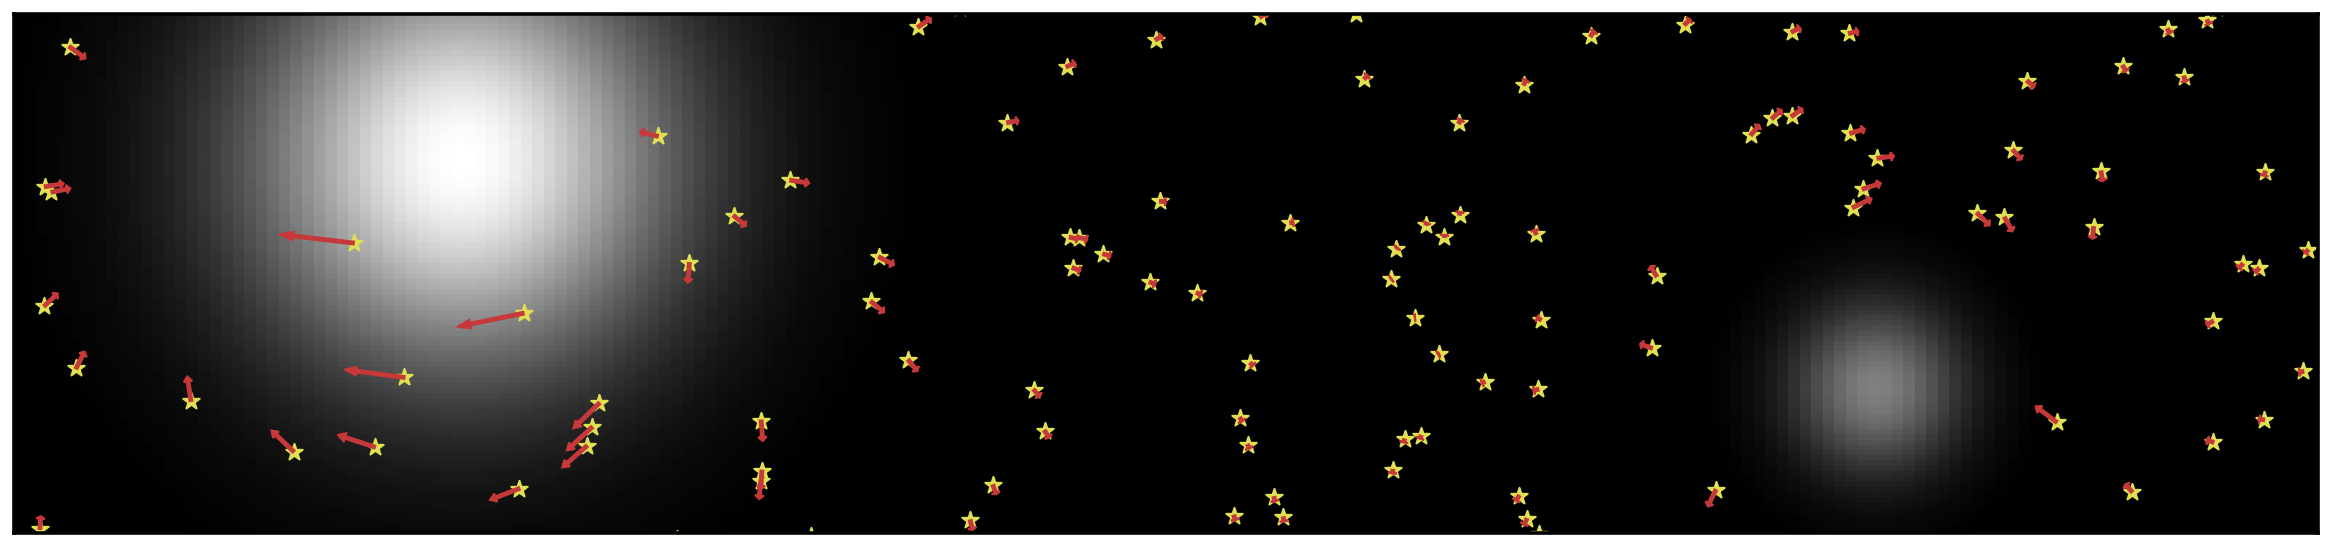

In [206]:
theta_x_lims = [-1.6 / 2., 1.6 / 2.]
theta_y_lims = [-0.9 / 5., 0.9 / 5.]

ds = DemoSim(theta_x_lims, theta_y_lims)

arrow_kwargs={'color':cols_default[0], 'width':0.01}
star_kwargs={'marker':'*', 'color':cols_default[5],'s':75}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':75}

n_lens = 2

# pos_l_ary = np.transpose([np.random.uniform(theta_x_lims[0], theta_x_lims[1], n_lens), np.random.uniform(theta_y_lims[0], theta_y_lims[1], n_lens)])
# v_l_ary = np.transpose([np.random.normal(0, 20, n_lens), np.random.normal(0, 0, n_lens)]) * Kmps
# R_l_ary = np.random.uniform(0, 0.05, n_lens) * pc
# M_l_ary = 10 ** np.random.uniform(5, 6, n_lens) * M_s

pos_l_ary = np.array([[-0.5, 0.08], [0.5, -0.08]])
v_l_ary = np.array([[20, 0], [-10, 0]]) * Kmps
R_l_ary = np.array([0.05, 0.02]) * pc
M_l_ary = 10 ** np.array([5.3, 5.]) * M_s

anim = ds.animation(dt=200, 
                    pos_l=pos_l_ary, v_l=v_l_ary, R_l=R_l_ary, M_l=M_l_ary,
                    D_l=len(M_l_ary)*[100 * kpc], n_frames=800, arrow_mult=2000, animate=True, show_lens=True, show_vel_arrows=True, show_orig=False, show_sources=True,
                    n_lens_x=200, n_lens_y=100, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs,
                    n_dens = 1000,
                    source_pos="random",
                   figsize=(10 * (theta_x_lims[1] - theta_x_lims[0]), 10 * (theta_y_lims[1] - theta_y_lims[0])))

In [207]:
# # HTML(anim.to_html5_video())
# anim.save(output_dir + "correlations.mp4")

In [ ]:
anim.save(output_dir + "correlations.gif", writer='imagemagick', fps=25)

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
